In [1]:
# Import de librerias

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
import scipy

In [6]:
# Carga de datos
data = pd.read_csv('StudentPerformanceFactors.csv')

In [7]:
# Exploracion inicial de datos
print("\nInformacion general de los datos:")
data.head()


Informacion general de los datos:


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [8]:
num_rows, num_columns = data.shape

In [9]:
print(f"Nro. filas: {num_rows}")

Nro. filas: 6607


In [10]:
print(f"Nro. columnas: {num_columns}")

Nro. columnas: 20


In [11]:
# analisis estadistico variables cuantitativas
print("\nEstadísticas descriptivas de variables cuantitativas:")
data.describe()


Estadísticas descriptivas de variables cuantitativas:


,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [12]:
# Analisis de missing values 
print("\nMissing values:")
missing_values = data.isnull().sum()


Missing values:


In [13]:
missing_percentage = (missing_values / len(data)) * 100

In [14]:
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

In [15]:
missing_summary = missing_summary[missing_summary['Missing Values'] > 0]

In [16]:
print(missing_summary)

                          Missing Values  Percentage
Teacher_Quality                       78    1.180566
Parental_Education_Level              90    1.362192
Distance_from_Home                    67    1.014076


In [17]:
# ya que los porcentajes de MV son muy bajos para cada variable, busco la moda de cada variable para reemplazarlo
teacher_quality_mode = data['Teacher_Quality'].mode()[0]
parental_education_mode = data['Parental_Education_Level'].mode()[0]
distance_from_home_mode = data['Distance_from_Home'].mode()[0]

print("Teacher Quality - Moda: ", teacher_quality_mode)
print("Parental Education Level - Moda: ", parental_education_mode)
print("Distance from Home - Moda: ", distance_from_home_mode)

Teacher Quality - Moda:  Medium
Parental Education Level - Moda:  High School
Distance from Home - Moda:  Near


In [18]:
print(missing_summary)

                          Missing Values  Percentage
Teacher_Quality                       78    1.180566
Parental_Education_Level              90    1.362192
Distance_from_Home                    67    1.014076


In [19]:
print(missing_summary)

                          Missing Values  Percentage
Teacher_Quality                       78    1.180566
Parental_Education_Level              90    1.362192
Distance_from_Home                    67    1.014076


In [20]:
# reemplazo missing values por el valor de la moda para cada caso
data['Teacher_Quality'] = data['Teacher_Quality'].fillna(teacher_quality_mode)
data['Parental_Education_Level'] = data['Parental_Education_Level'].fillna(parental_education_mode)
data['Distance_from_Home'] = data['Distance_from_Home'].fillna(distance_from_home_mode)

# verifico si quedan missing values luego de imputarlos
print(data.isnull().sum())

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


In [21]:
##Analisis univariado

#Análisis de variables cualitativas

qualitative_vars = ['Parental_Involvement', 'Access_to_Resources', 
                       'Extracurricular_Activities', 'Motivation_Level', 
                       'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 
                       'Peer_Influence', 'Learning_Disabilities','Parental_Education_Level', 'Distance_from_Home','Gender']

for column in qualitative_vars: 
    moda = data[column].mode()[0]
    print(f"Moda de {column}: {moda}")

Moda de Parental_Involvement: Medium
Moda de Access_to_Resources: Medium
Moda de Extracurricular_Activities: Yes
Moda de Motivation_Level: Medium
Moda de Internet_Access: Yes
Moda de Family_Income: Low
Moda de Teacher_Quality: Medium
Moda de School_Type: Public
Moda de Peer_Influence: Positive
Moda de Learning_Disabilities: No
Moda de Parental_Education_Level: High School
Moda de Distance_from_Home: Near
Moda de Gender: Male


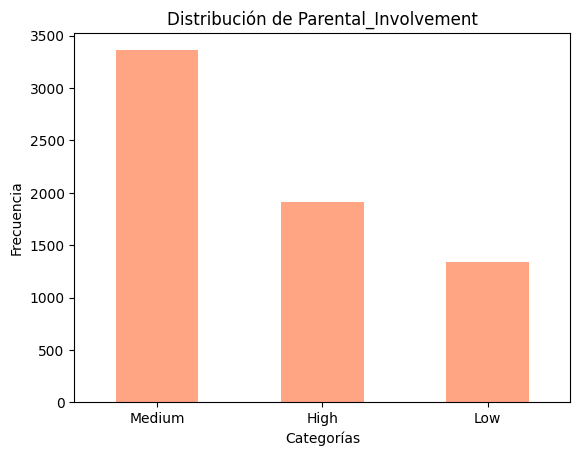

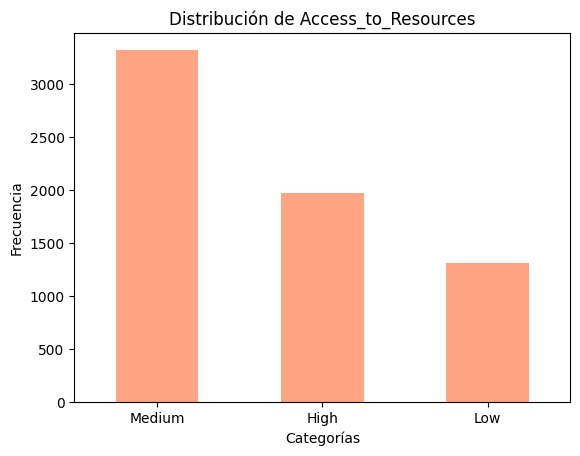

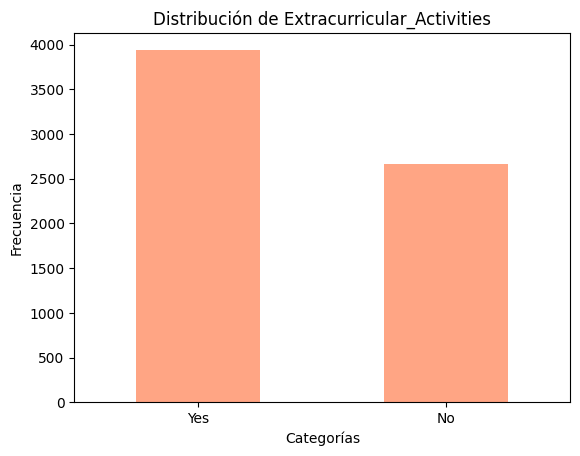

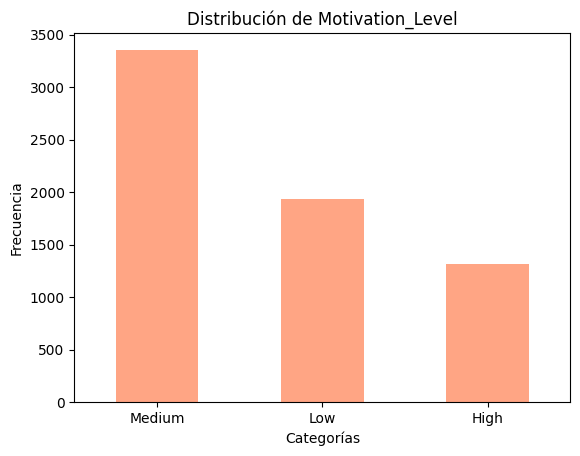

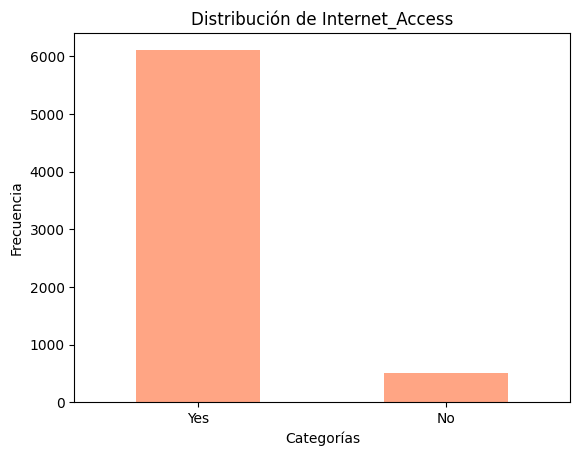

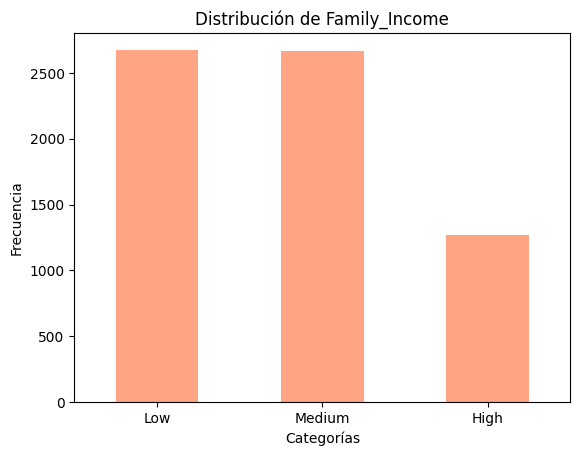

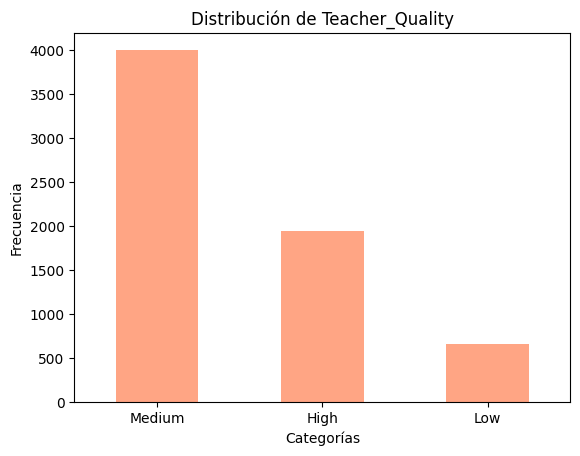

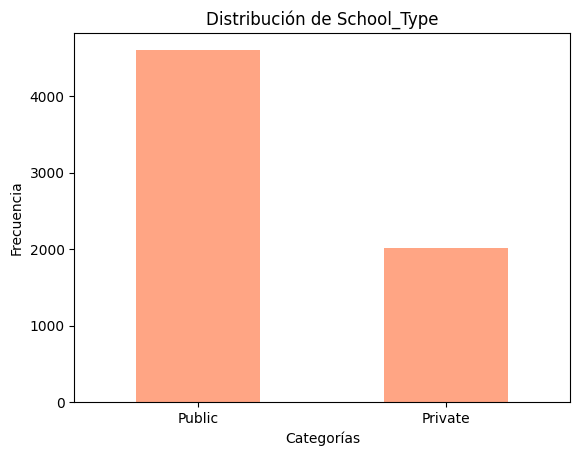

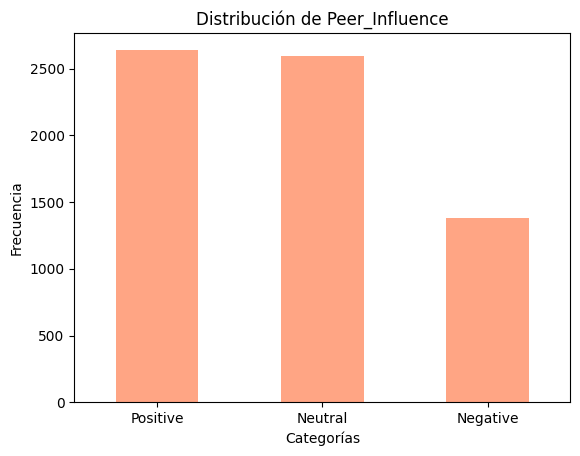

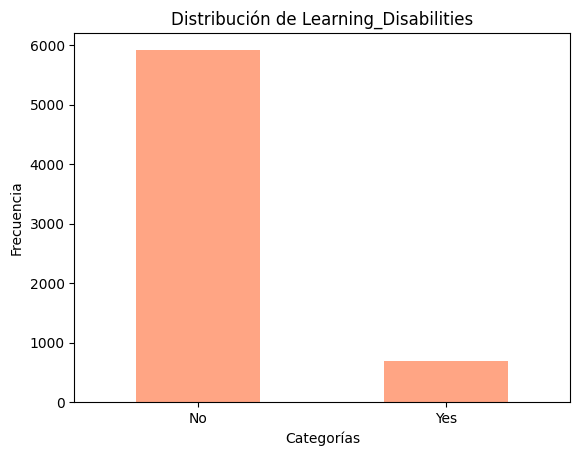

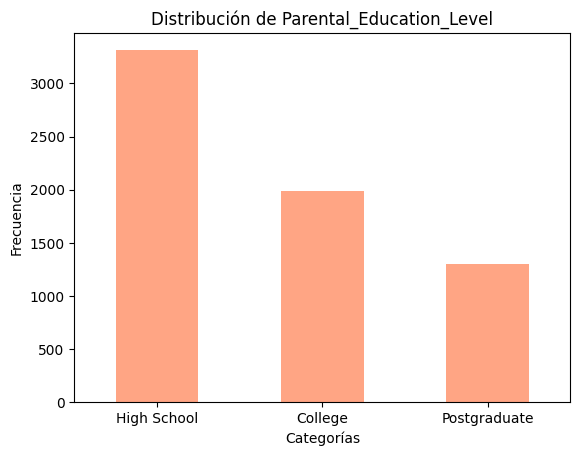

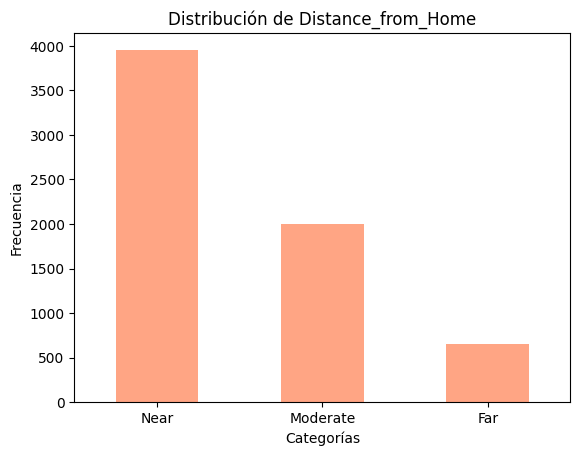

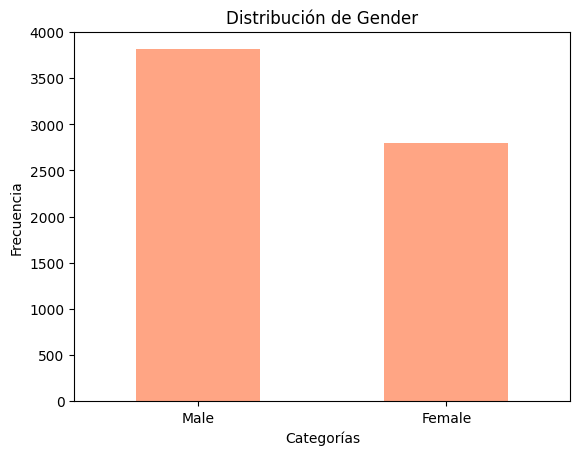

In [22]:
# Gráficos para todas las variables cualitativas
for column in qualitative_vars:
    value_counts = data[column].value_counts()
    value_counts.plot(kind='bar', color='coral', alpha=0.7)
    plt.title(f"Distribución de {column}")
    plt.xlabel("Categorías")
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=0)
    plt.show()

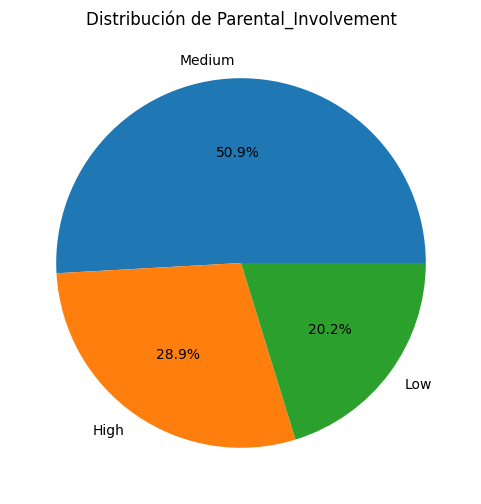

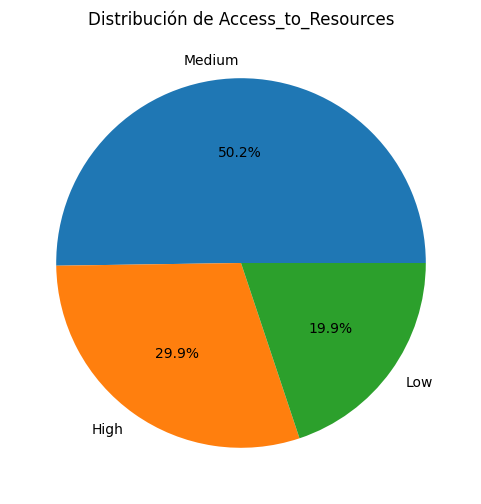

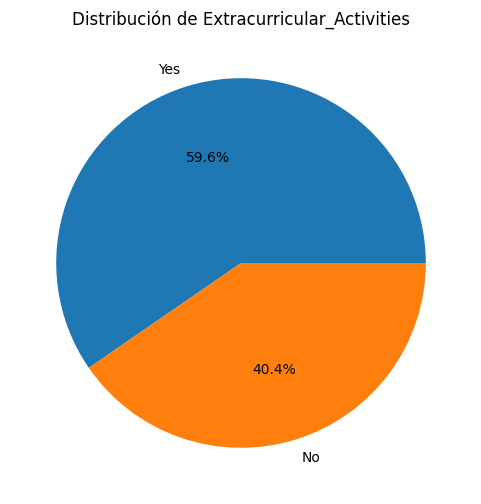

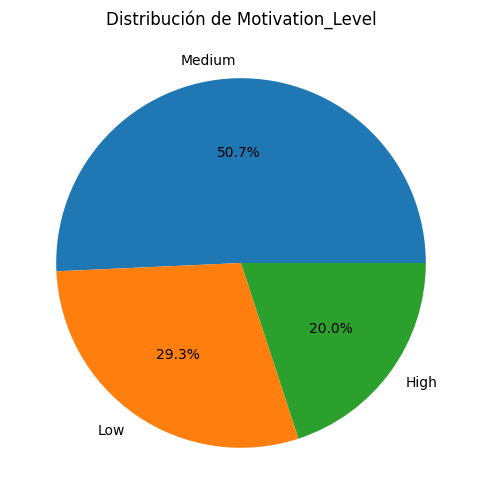

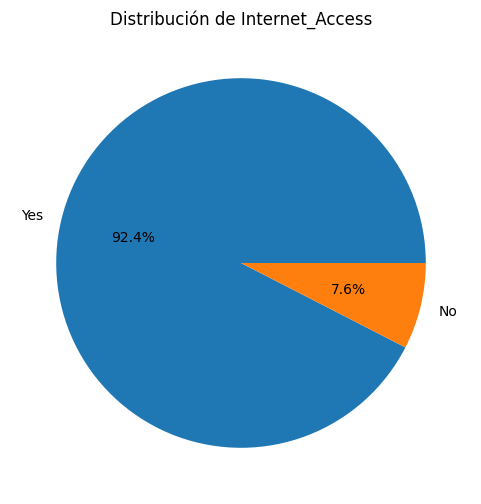

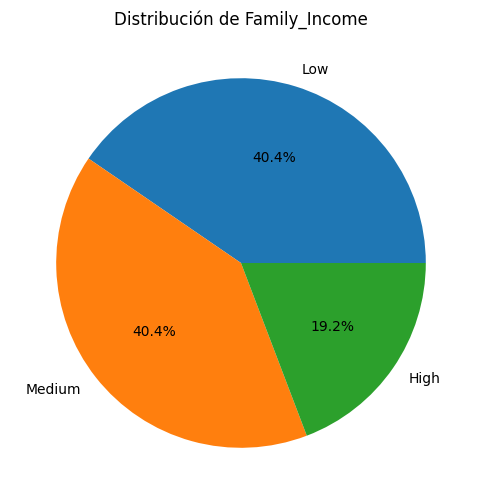

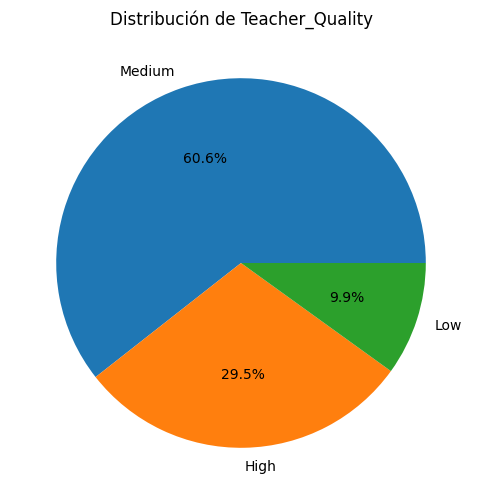

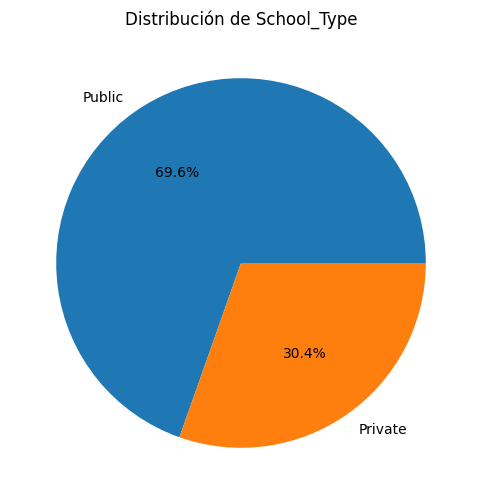

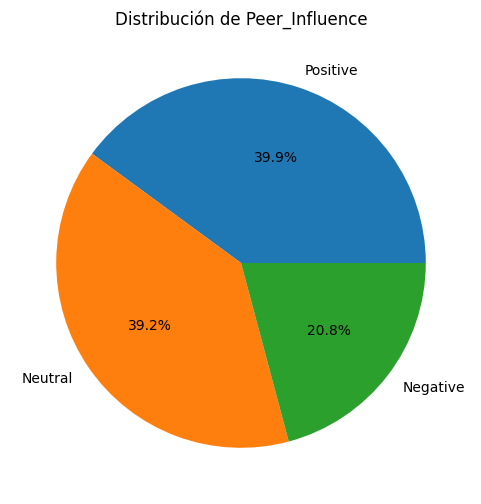

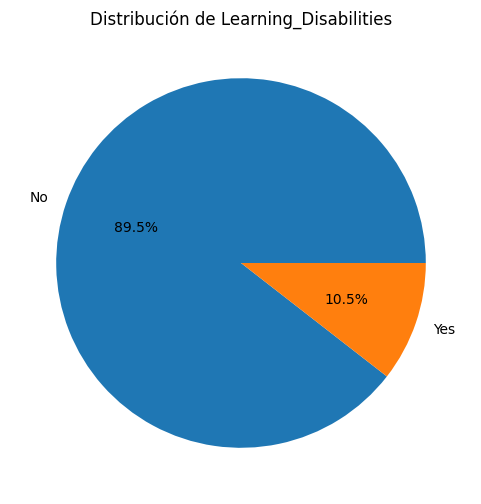

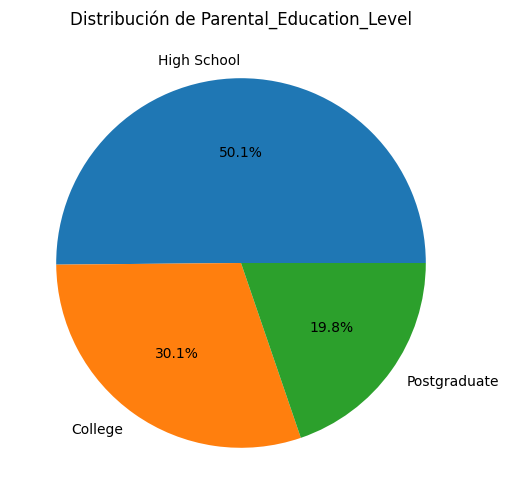

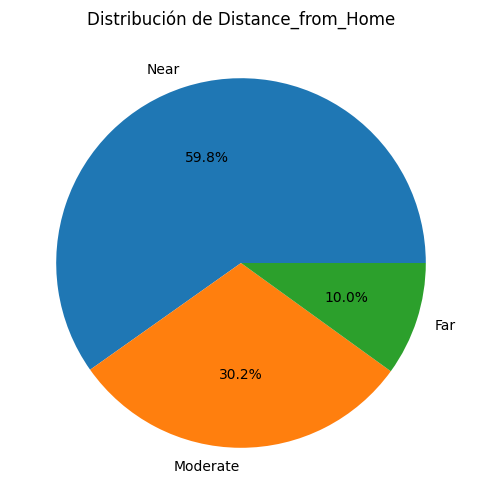

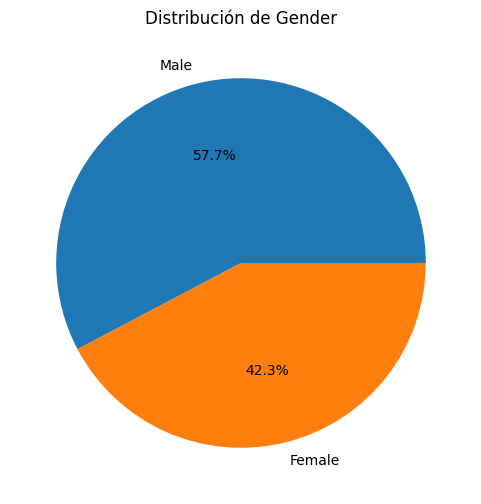

In [23]:
# Gráfico circular para variables cualitativas
for column in qualitative_vars:
    data[column].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6))
    plt.title(f"Distribución de {column}")
    plt.ylabel("")  # Quita el texto por defecto del eje Y
    plt.show()

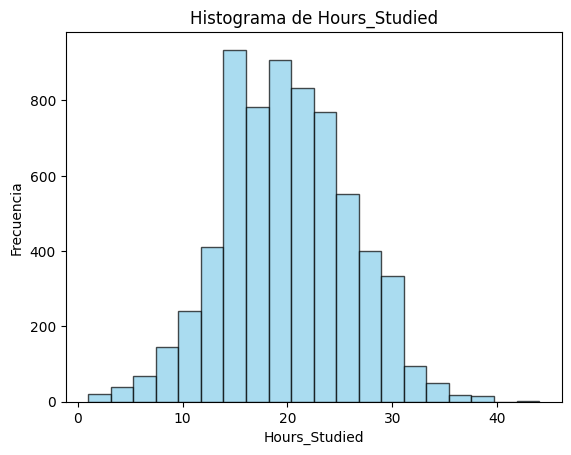

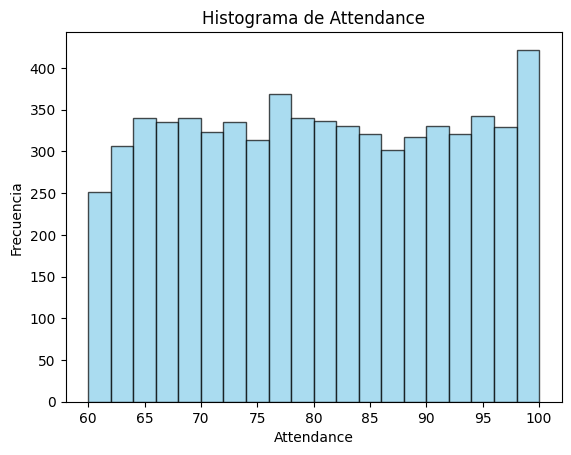

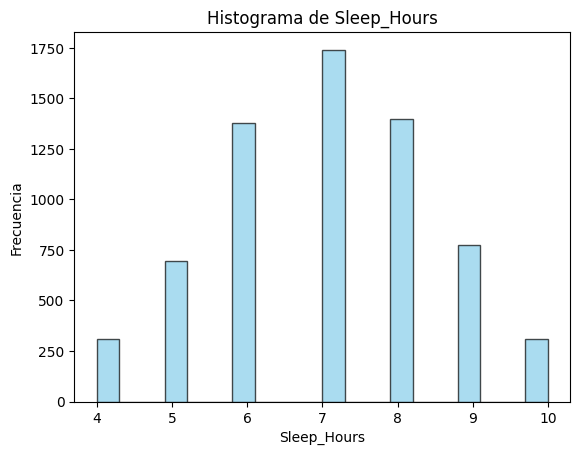

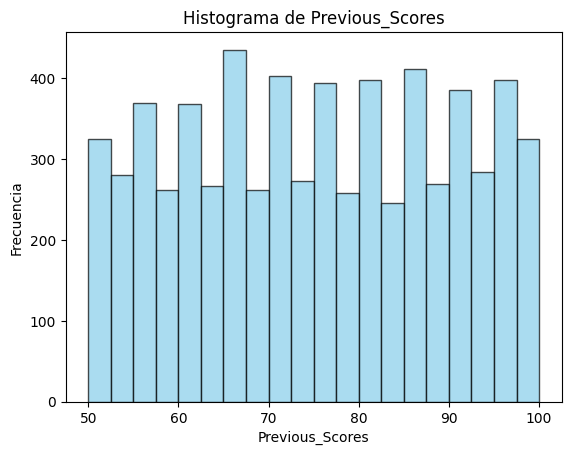

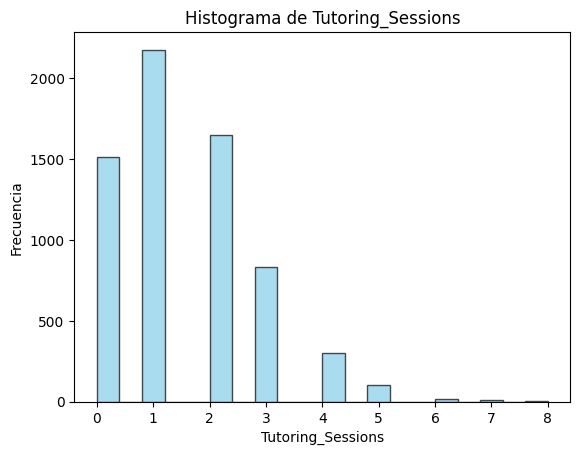

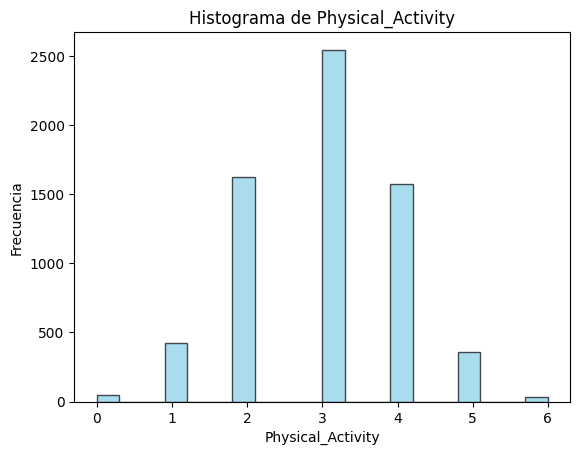

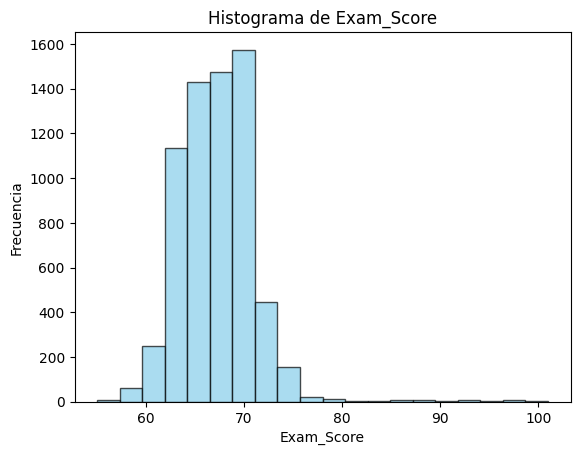

In [24]:
# Variables cuantitativas

# Histogramas
quantitative_vars = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 
                        'Previous_Scores', 'Tutoring_Sessions', 
                        'Physical_Activity', 'Exam_Score']

for column in quantitative_vars:
    data[column].plot(kind='hist', bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    plt.title(f"Histograma de {column}")
    plt.xlabel(column)
    plt.ylabel("Frecuencia")
    plt.show()

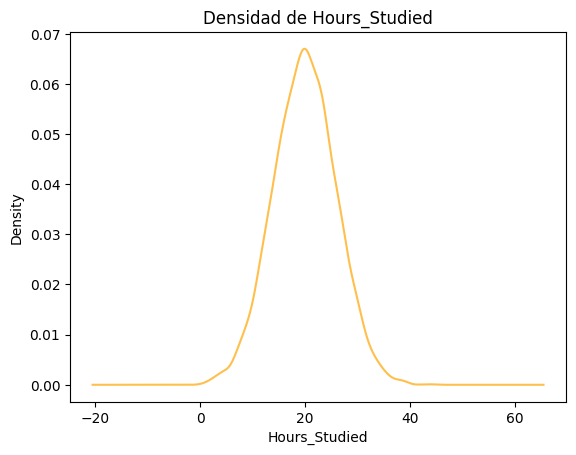

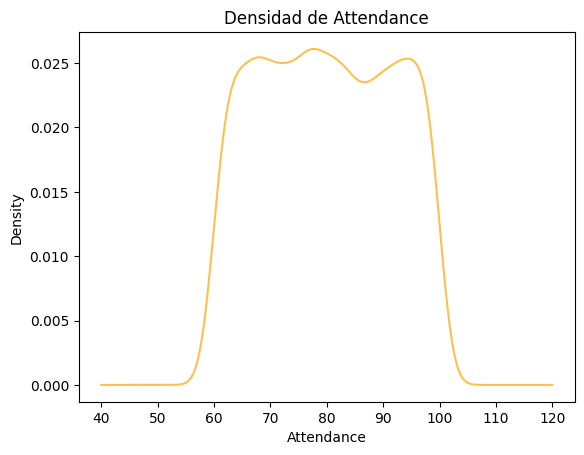

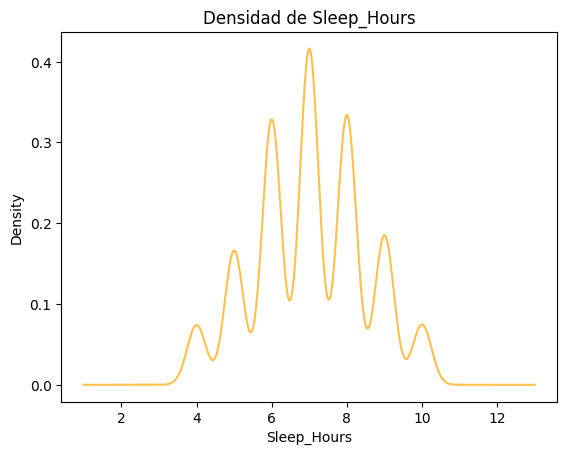

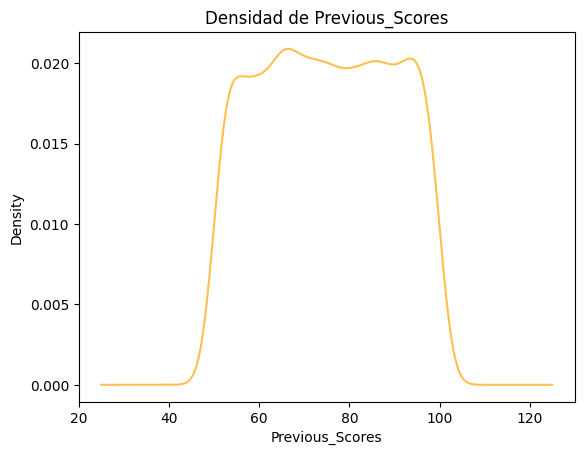

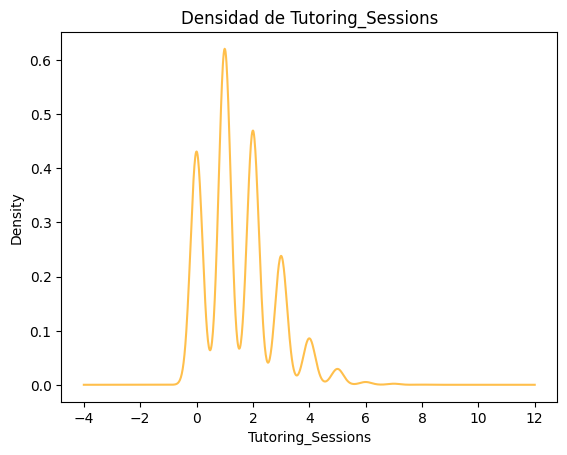

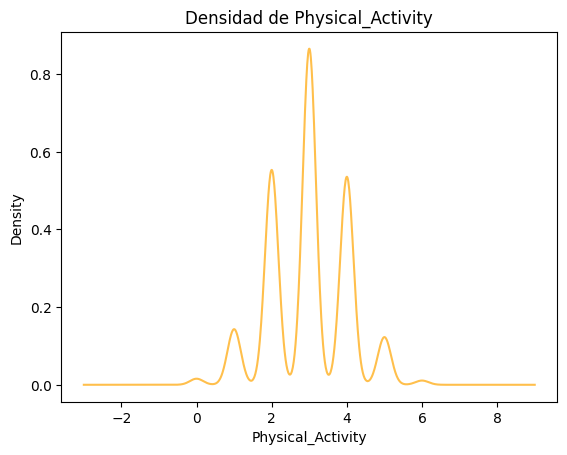

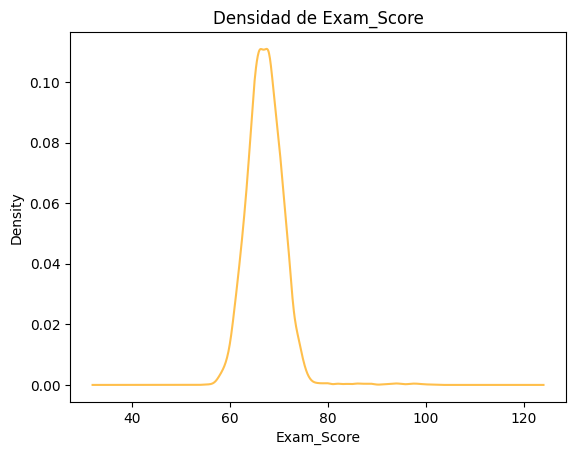

In [25]:
for column in quantitative_vars:
    data[column].plot(kind='density', alpha=0.7, color='orange')
    plt.title(f"Densidad de {column}")
    plt.xlabel(column)
    plt.show()

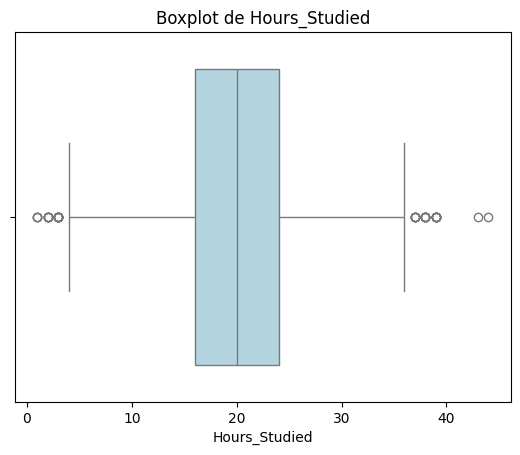

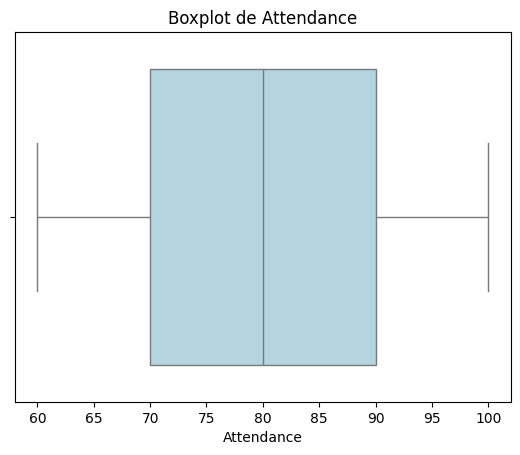

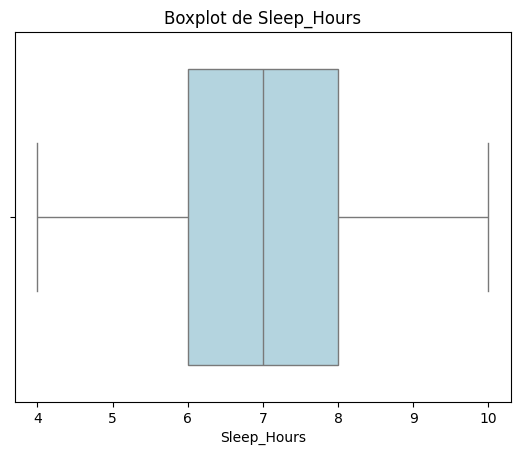

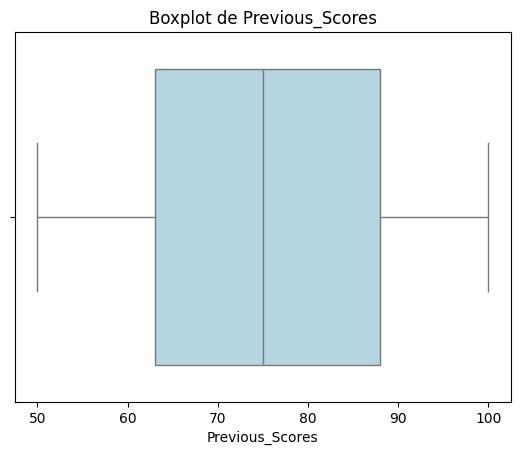

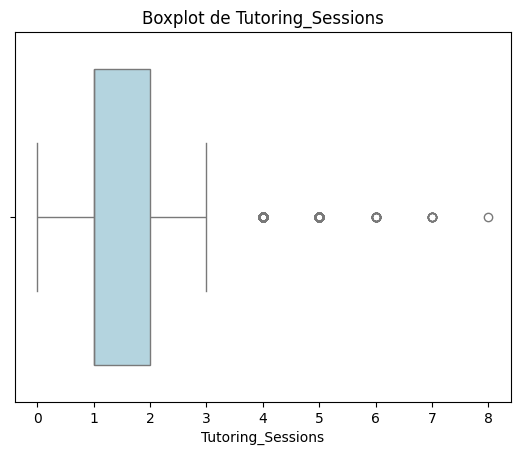

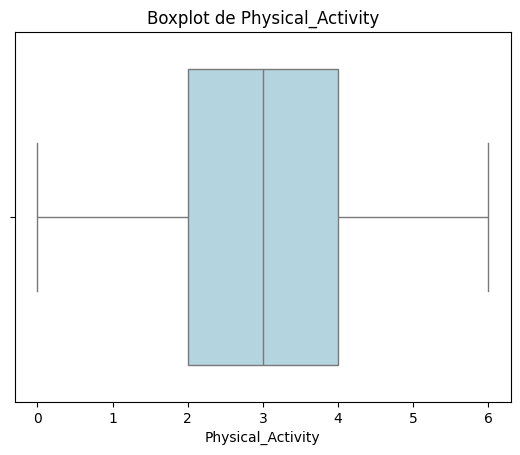

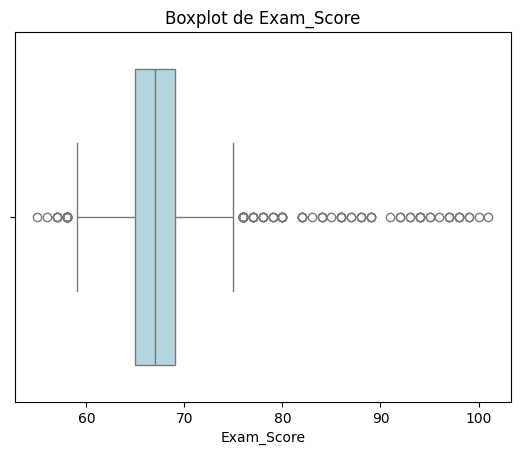

In [26]:
# Boxplots de variables cuantitativas
for column in quantitative_vars:
    sns.boxplot(x=data[column], color='lightblue')
    plt.title(f"Boxplot de {column}")
    plt.xlabel(column)
    plt.show()

In [27]:
# Crear tablas de frecuencia para variables cuantitativas
for column in quantitative_vars:
    frequency_table = pd.cut(data[column], bins=10).value_counts().sort_index()
    print(f"Tabla de distribución de frecuencia para {column}:\n{frequency_table}\n")

Tabla de distribución de frecuencia para Hours_Studied:
Hours_Studied
(0.957, 5.3]      59
(5.3, 9.6]       212
(9.6, 13.9]      650
(13.9, 18.2]    1717
(18.2, 22.5]    1739
(22.5, 26.8]    1320
(26.8, 31.1]     734
(31.1, 35.4]     143
(35.4, 39.7]      31
(39.7, 44.0]       2
Name: count, dtype: int64

Tabla de distribución de frecuencia para Attendance:
Attendance
(59.96, 64.0]    740
(64.0, 68.0]     663
(68.0, 72.0]     660
(72.0, 76.0]     667
(76.0, 80.0]     693
(80.0, 84.0]     673
(84.0, 88.0]     603
(88.0, 92.0]     647
(92.0, 96.0]     678
(96.0, 100.0]    583
Name: count, dtype: int64

Tabla de distribución de frecuencia para Sleep_Hours:
Sleep_Hours
(3.994, 4.6]     309
(4.6, 5.2]       695
(5.2, 5.8]         0
(5.8, 6.4]      1376
(6.4, 7.0]      1741
(7.0, 7.6]         0
(7.6, 8.2]      1399
(8.2, 8.8]         0
(8.8, 9.4]       775
(9.4, 10.0]      312
Name: count, dtype: int64

Tabla de distribución de frecuencia para Previous_Scores:
Previous_Scores
(49.95, 55.0]  

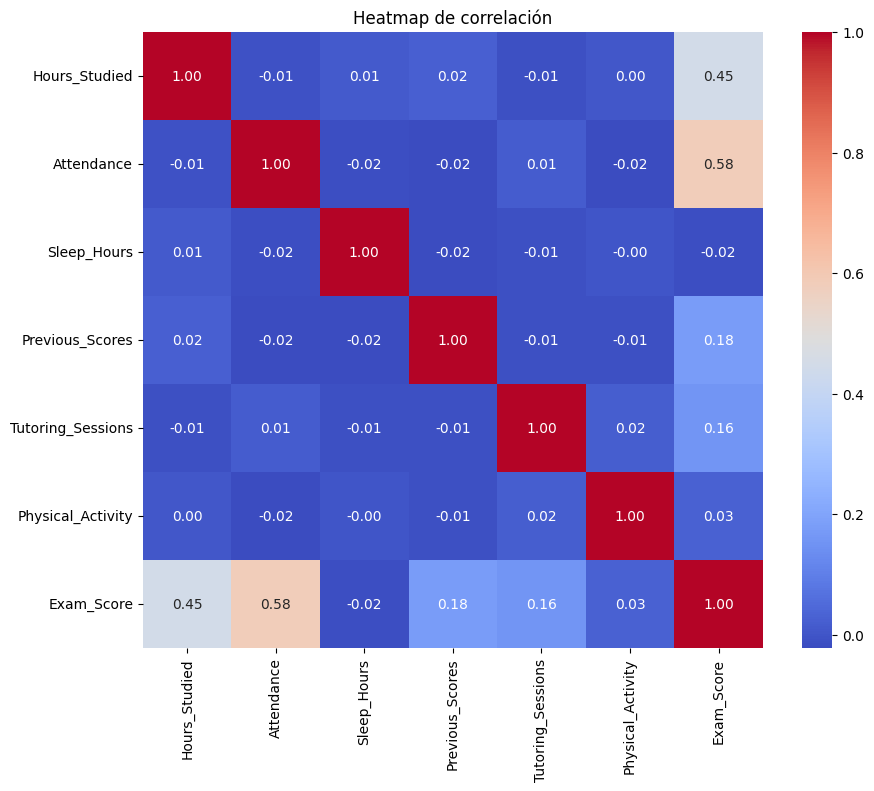

In [28]:
## Anàlisis bivariado

# Correlación con Exam_Score

# Filtrar variables numéricas
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculo correlación
correlations = numeric_data.corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Heatmap de correlación")
plt.show()

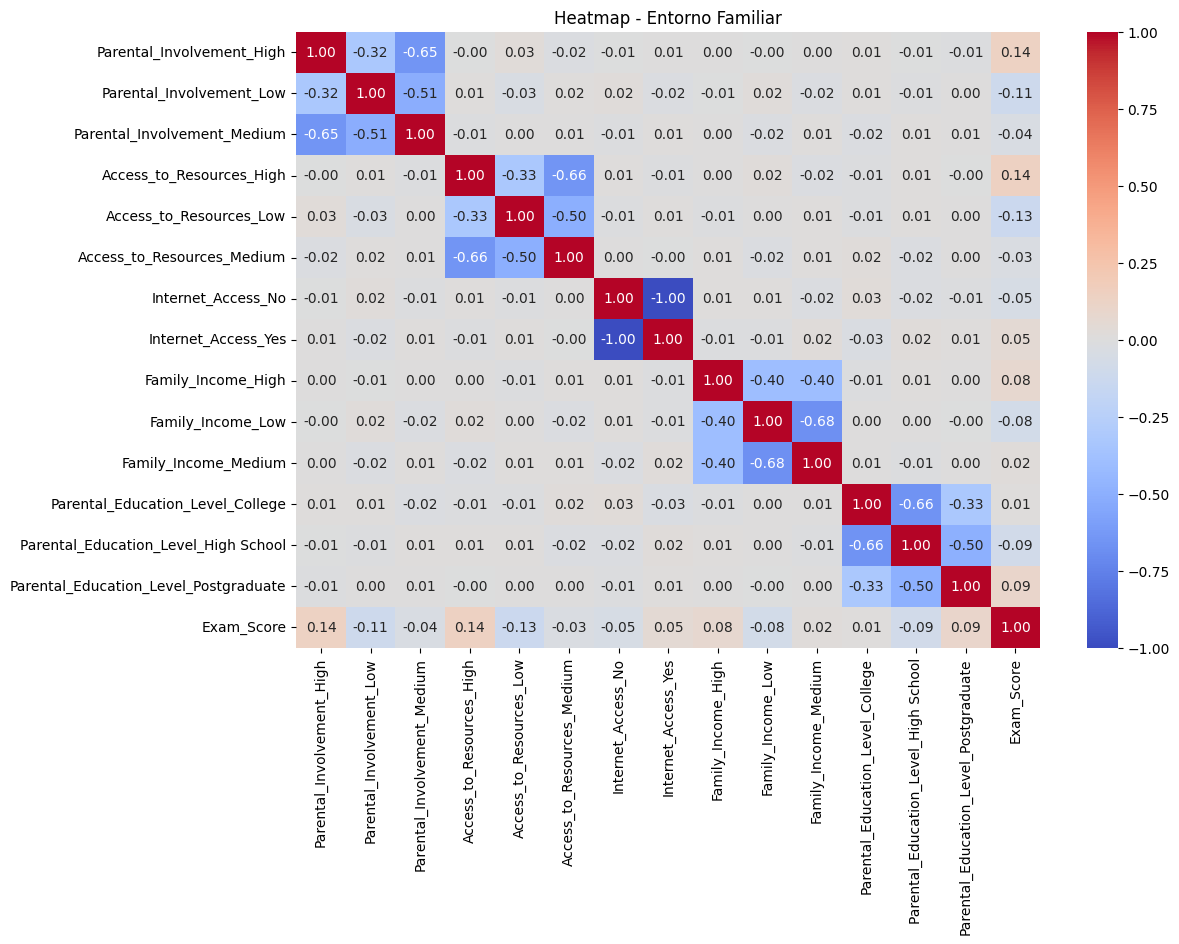

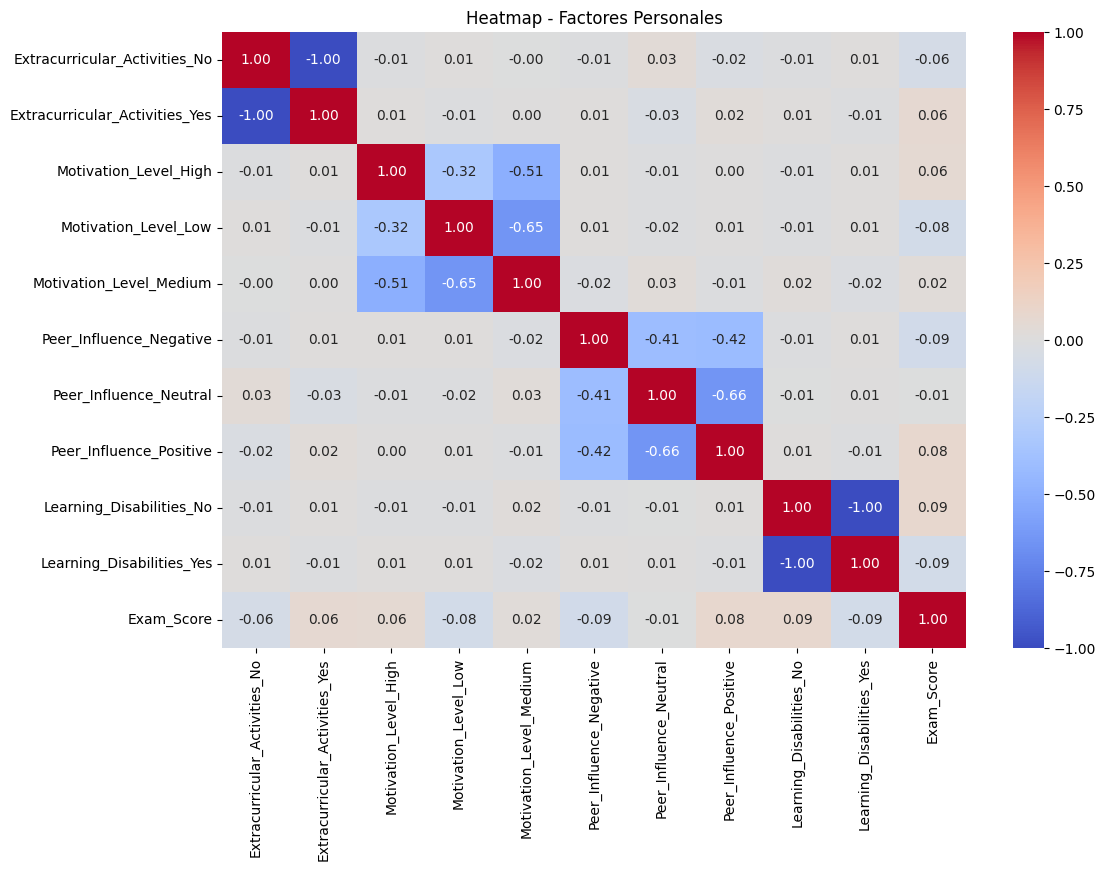

In [29]:
# Aplicar One-Hot Encoding solo a las variables categóricas relevantes
categorical_vars = ['Parental_Involvement', 'Access_to_Resources', 'Internet_Access', 
                    'Family_Income', 'Parental_Education_Level', 'Extracurricular_Activities', 
                    'Motivation_Level', 'Peer_Influence', 'Learning_Disabilities']

encoded_data = pd.get_dummies(data, columns=categorical_vars, drop_first=False)

# Selección manual de columnas de interés para entorno familiar
family_vars = [col for col in encoded_data.columns if 'Parental' in col or 
               'Access_to_Resources' in col or 
               'Internet_Access' in col or 
               'Family_Income' in col]

# Crear heatmap con solo estas variables
family_data = encoded_data[family_vars + ['Exam_Score']]
plt.figure(figsize=(12, 8))
sns.heatmap(family_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Heatmap - Entorno Familiar")
plt.show()

# Selección manual de columnas de interés para factores personales
personal_factors_vars = [col for col in encoded_data.columns if 'Extracurricular' in col or 
               'Motivation_Level' in col or 
               'Peer_Influence' in col or 
               'Learning_Disabilities' in col]

# Crear heatmap con solo estas variables
personal_factors_data = encoded_data[personal_factors_vars + ['Exam_Score']]
plt.figure(figsize=(12, 8))
sns.heatmap(personal_factors_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Heatmap - Factores Personales")
plt.show()

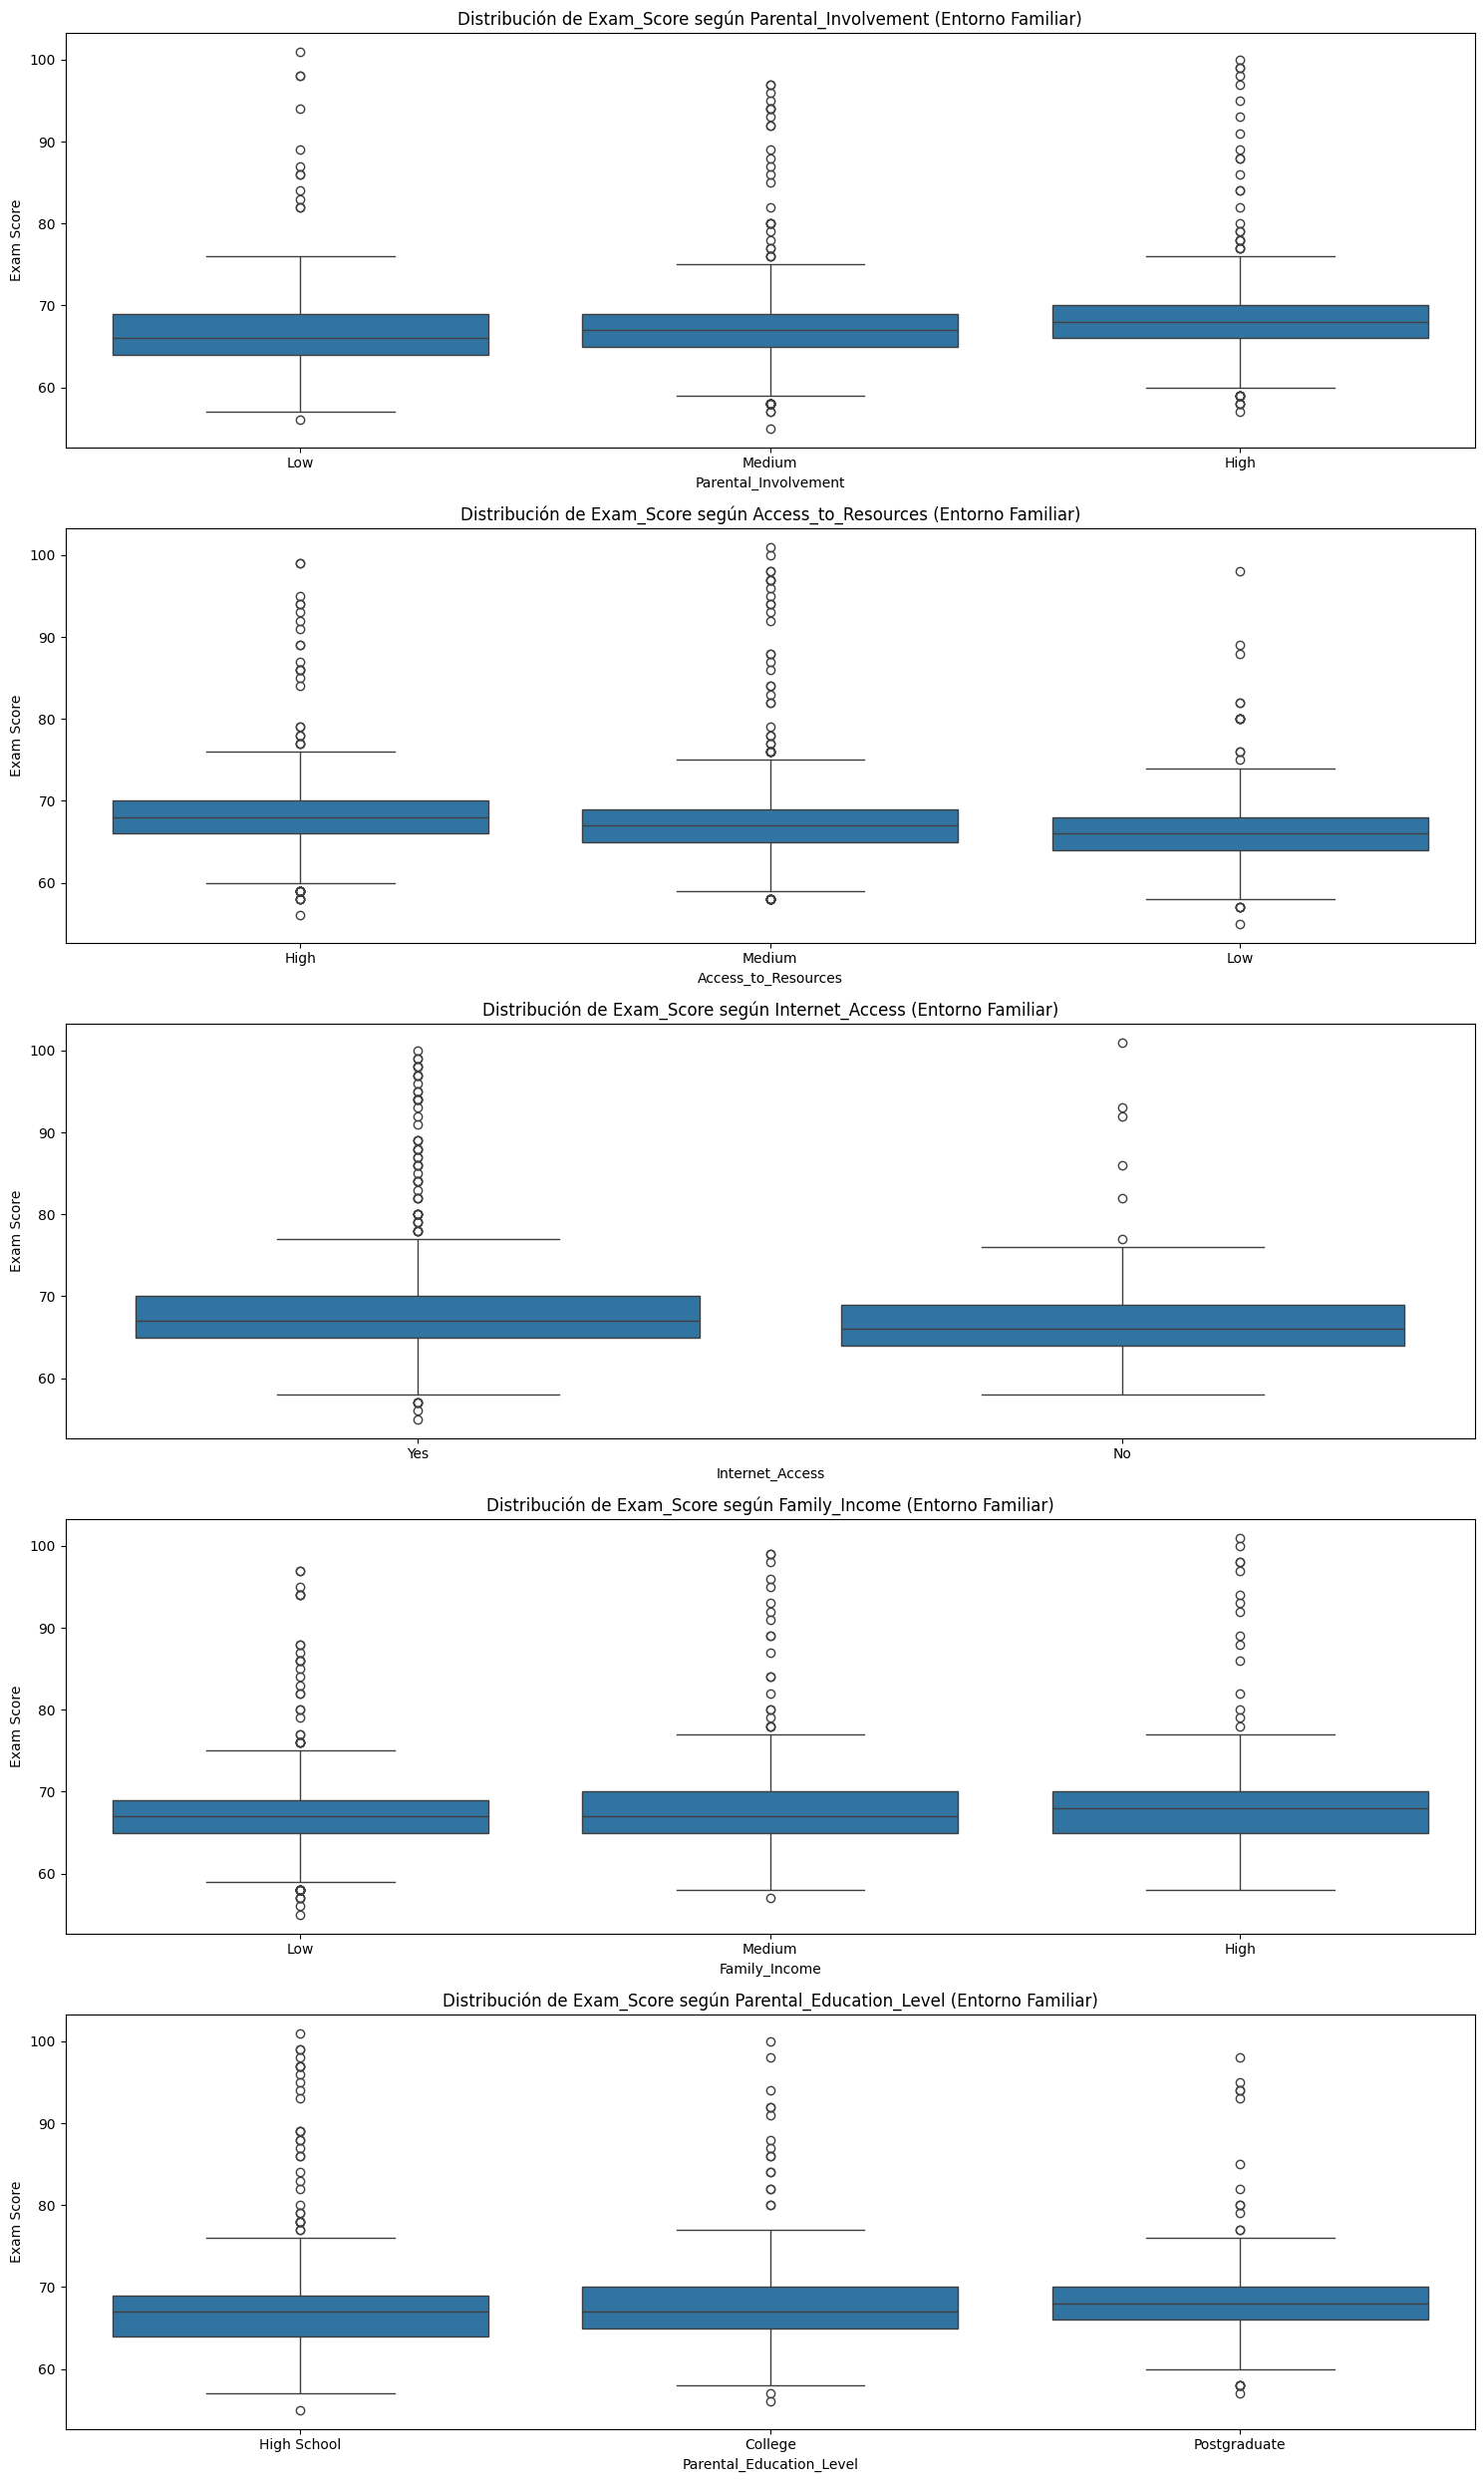

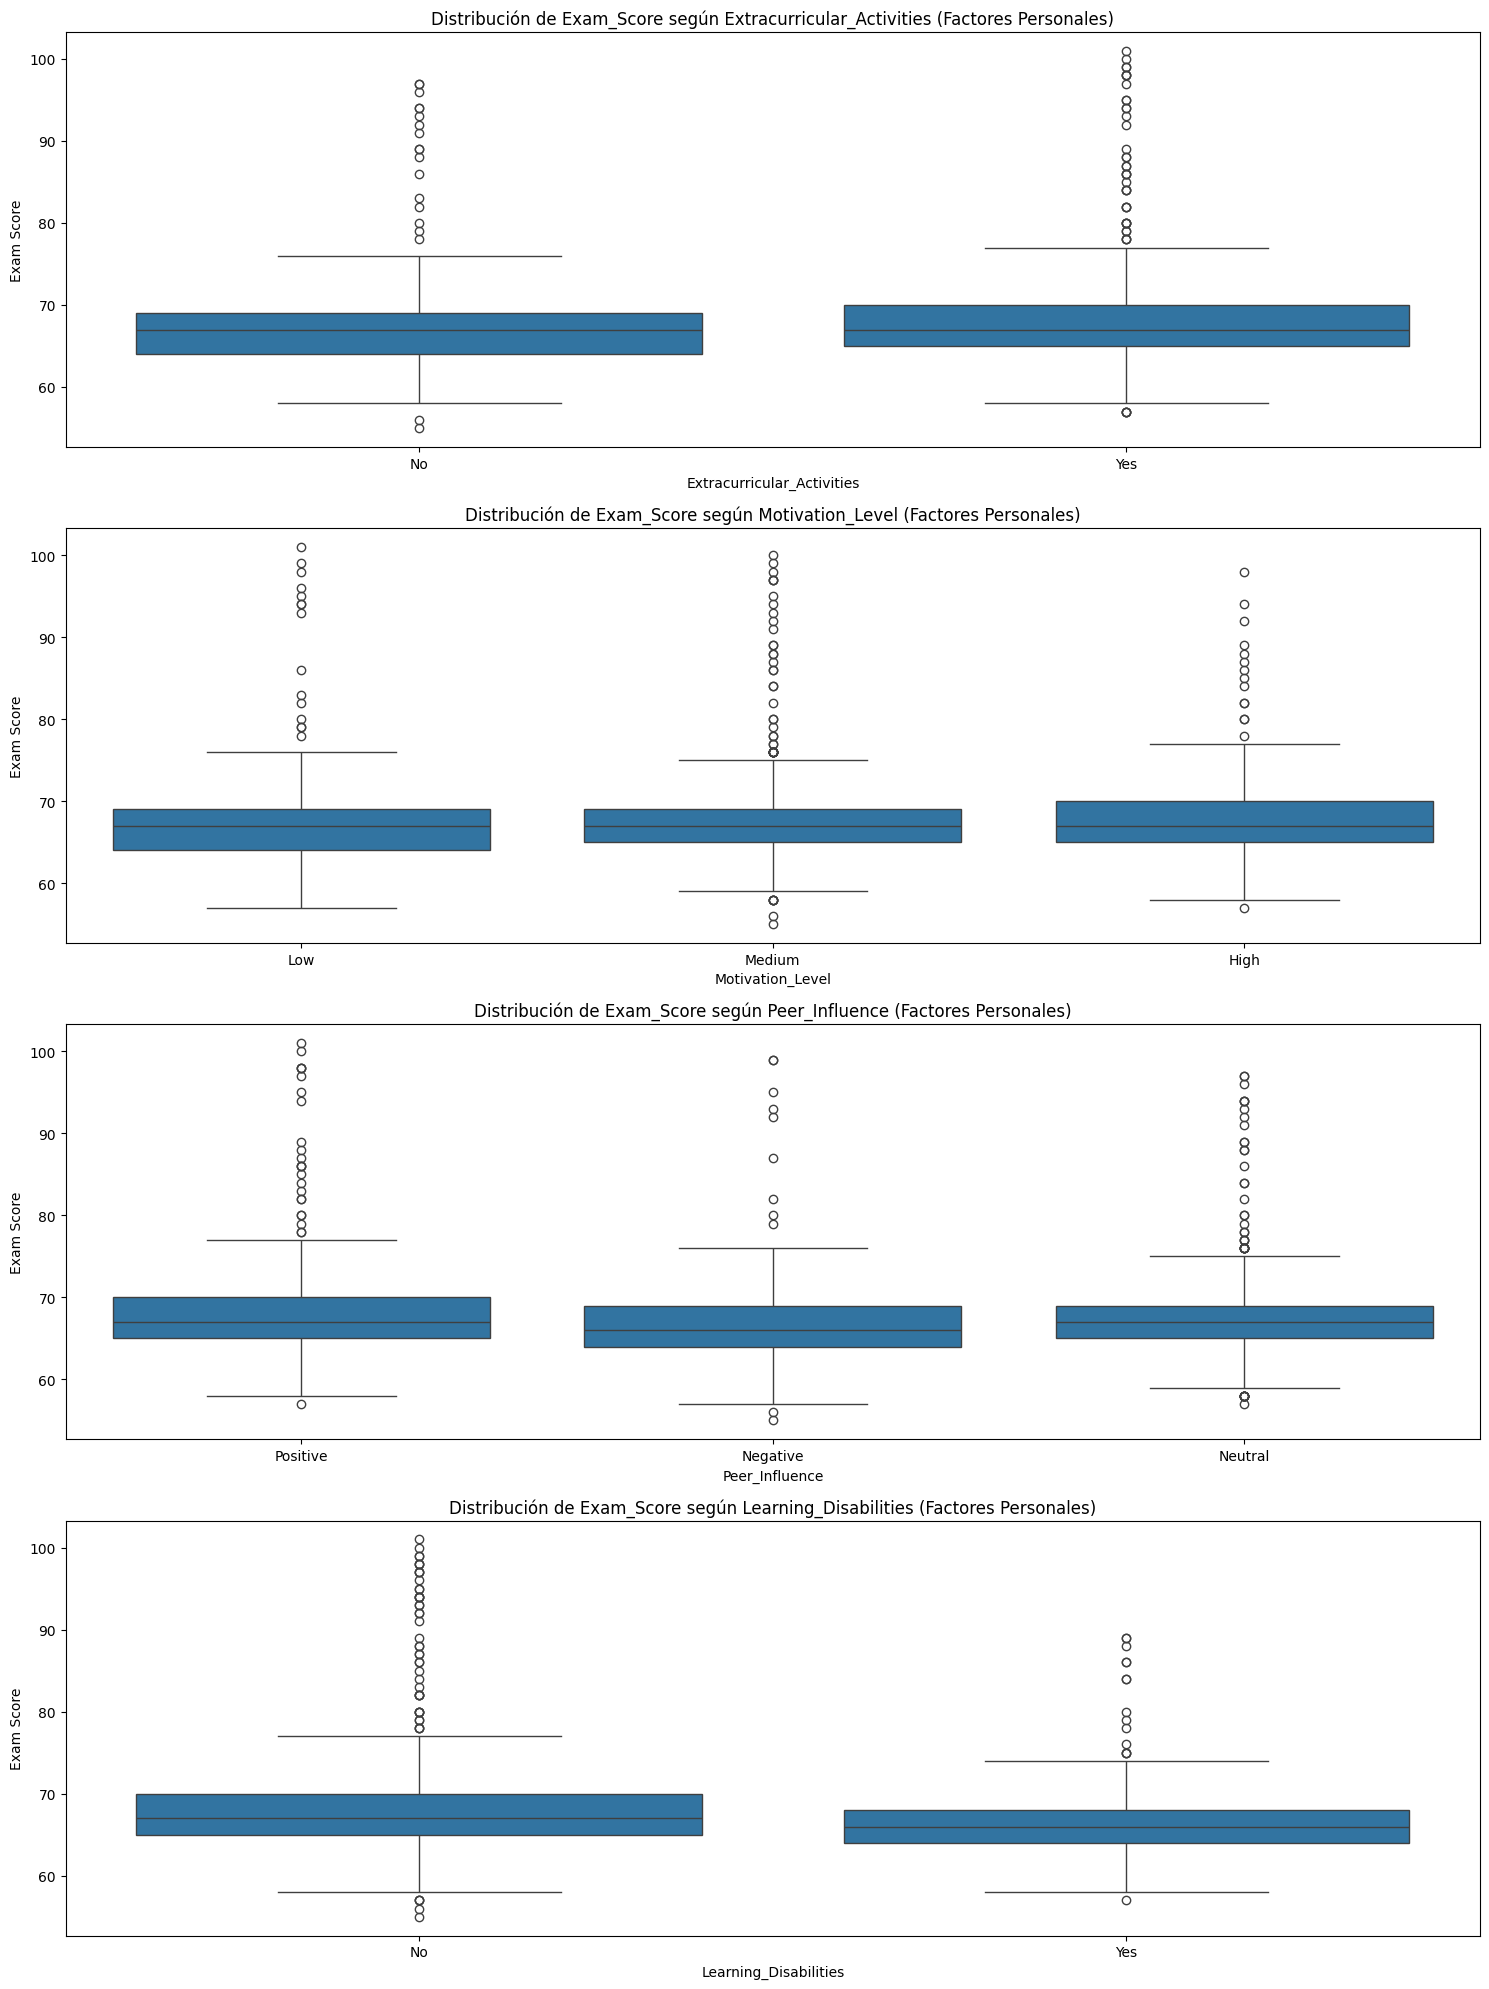

In [30]:
# Variables categóricas por objetivo de estudio
categorical_vars_objectives = {
    "Entorno Familiar": ['Parental_Involvement', 'Access_to_Resources', 
                         'Internet_Access', 'Family_Income', 'Parental_Education_Level'],
    "Factores Personales": ['Extracurricular_Activities', 'Motivation_Level', 
                            'Peer_Influence', 'Learning_Disabilities']
}

# Generar boxplots por objetivos
for objective, variables in categorical_vars_objectives.items():
    plt.figure(figsize=(15, 5 * len(variables)))
    for i, var in enumerate(variables, start=1):
        plt.subplot(len(variables), 1, i)
        sns.boxplot(x=var, y='Exam_Score', data=data)
        plt.title(f"Distribución de Exam_Score según {var} ({objective})")
        plt.xlabel(var)
        plt.ylabel("Exam Score")
    plt.tight_layout()
    plt.show()

       Previous_Scores   Exam_Score
count      6607.000000  6607.000000
mean         75.070531    67.235659
std          14.399784     3.890456
min          50.000000    55.000000
25%          63.000000    65.000000
50%          75.000000    67.000000
75%          88.000000    69.000000
max         100.000000   101.000000


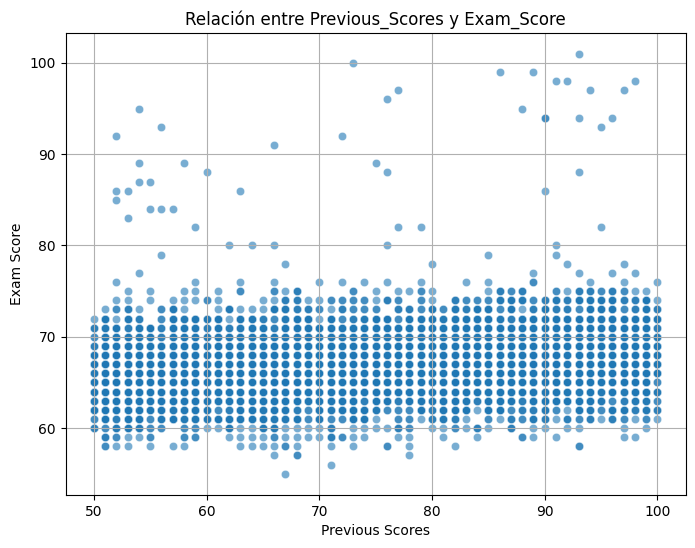

Correlación entre Previous_Scores y Exam_Score: 0.18


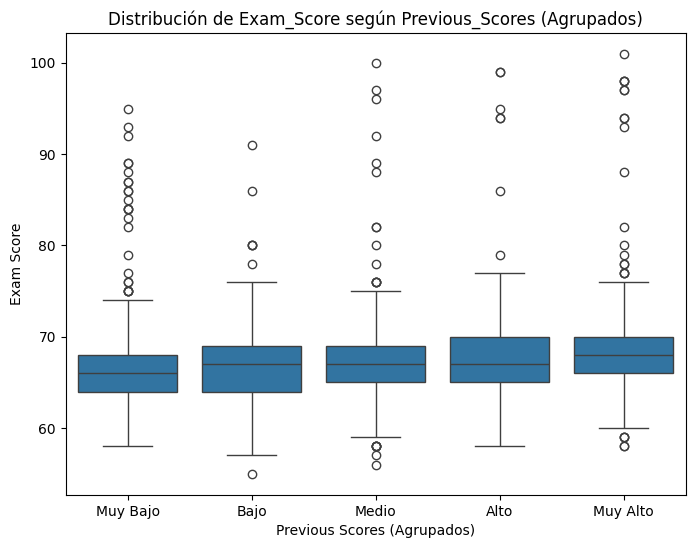

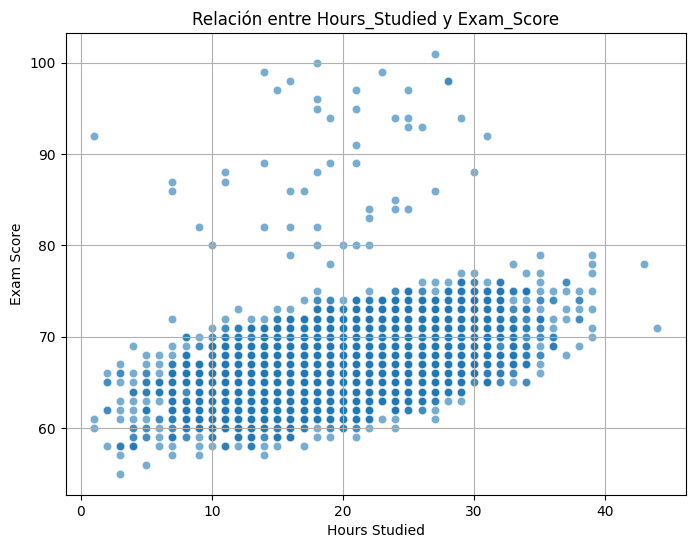

Correlación entre Hours_Studied y Exam_Score: 0.45


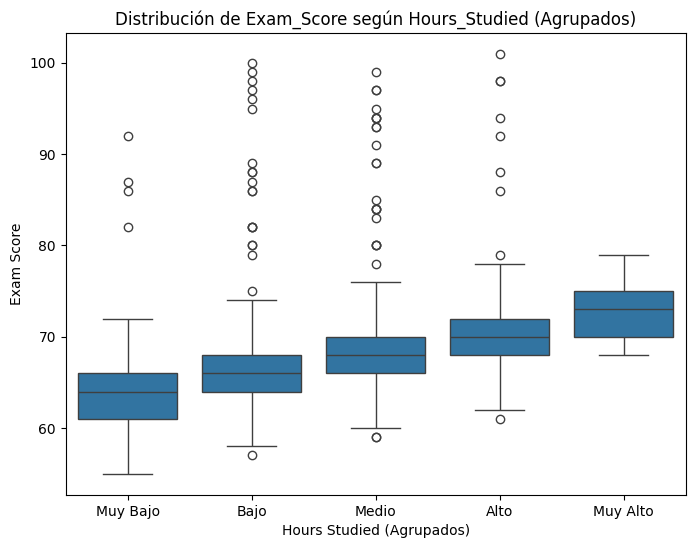

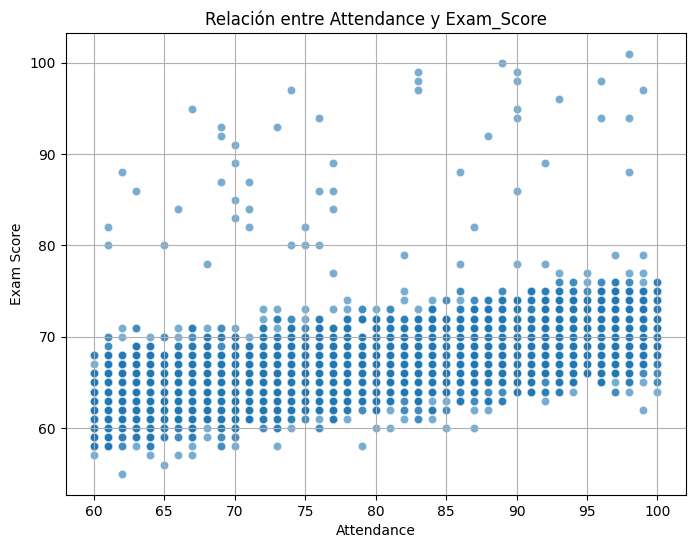

Correlación entre Attendance y Exam_Score: 0.58


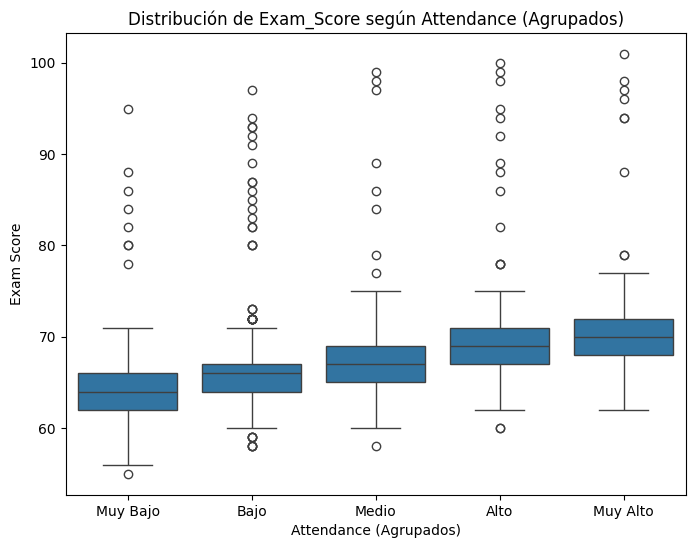

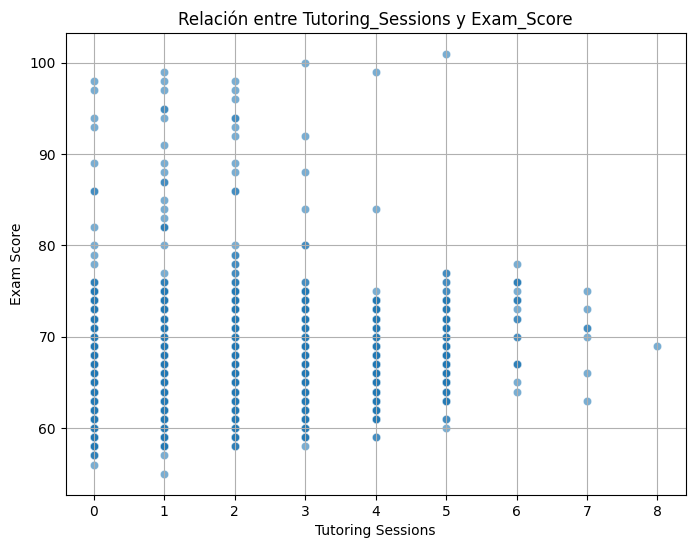

Correlación entre Tutoring_Sessions y Exam_Score: 0.16


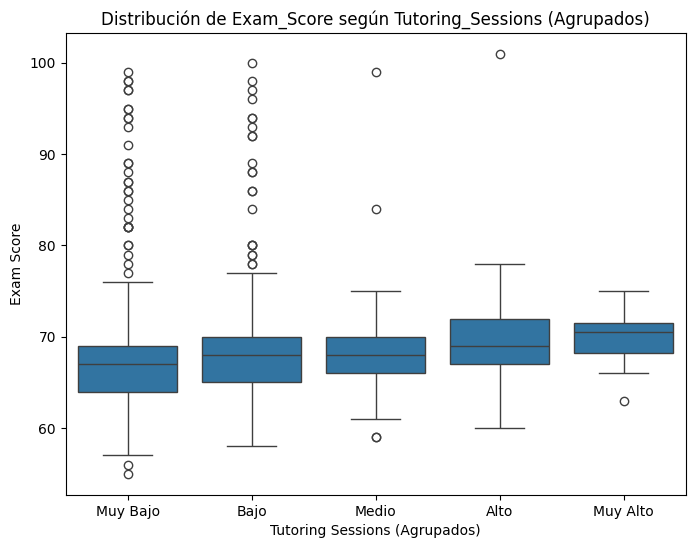

In [42]:
# analisis para bivariado para los habitos de estudio

# Descripción estadística de Previous_Scores y Exam_Score
print(data[['Previous_Scores', 'Exam_Score']].describe())

# Scatterplot de Previous_Scores vs Exam_Score
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Previous_Scores', y='Exam_Score', data=data, alpha=0.6)
plt.title("Relación entre Previous_Scores y Exam_Score")
plt.xlabel("Previous Scores")
plt.ylabel("Exam Score")
plt.grid(True)
plt.show()

# Cálculo de correlación
correlation = data['Previous_Scores'].corr(data['Exam_Score'])
print(f"Correlación entre Previous_Scores y Exam_Score: {correlation:.2f}")

# Crear bins para Previous_Scores
data['Previous_Scores_Binned'] = pd.cut(data['Previous_Scores'], bins=5, labels=['Muy Bajo', 'Bajo', 'Medio', 'Alto', 'Muy Alto'])

# Boxplot de Previous_Scores (agrupados) vs Exam_Score
plt.figure(figsize=(8, 6))
sns.boxplot(x='Previous_Scores_Binned', y='Exam_Score', data=data)
plt.title("Distribución de Exam_Score según Previous_Scores (Agrupados)")
plt.xlabel("Previous Scores (Agrupados)")
plt.ylabel("Exam Score")
plt.show()


# Scatterplot de Hours_Studied vs Exam_Score
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Hours_Studied', y='Exam_Score', data=data, alpha=0.6)
plt.title("Relación entre Hours_Studied y Exam_Score")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.grid(True)
plt.show()

# Cálculo de correlación
correlation = data['Hours_Studied'].corr(data['Exam_Score'])
print(f"Correlación entre Hours_Studied y Exam_Score: {correlation:.2f}")

# Crear bins para Hours_Studied
data['Hours_Studied_Binned'] = pd.cut(data['Hours_Studied'], bins=5, labels=['Muy Bajo', 'Bajo', 'Medio', 'Alto', 'Muy Alto'])

# Boxplot de Hours_Studied (agrupados) vs Exam_Score
plt.figure(figsize=(8, 6))
sns.boxplot(x='Hours_Studied_Binned', y='Exam_Score', data=data)
plt.title("Distribución de Exam_Score según Hours_Studied (Agrupados)")
plt.xlabel("Hours Studied (Agrupados)")
plt.ylabel("Exam Score")
plt.show()

# Scatterplot de Attendance vs Exam_Score
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Attendance', y='Exam_Score', data=data, alpha=0.6)
plt.title("Relación entre Attendance y Exam_Score")
plt.xlabel("Attendance")
plt.ylabel("Exam Score")
plt.grid(True)
plt.show()

# Cálculo de correlación
correlation = data['Attendance'].corr(data['Exam_Score'])
print(f"Correlación entre Attendance y Exam_Score: {correlation:.2f}")

# Crear bins para Attendance
data['Attendance_Binned'] = pd.cut(data['Attendance'], bins=5, labels=['Muy Bajo', 'Bajo', 'Medio', 'Alto', 'Muy Alto'])

# Boxplot de Attendance (agrupados) vs Exam_Score
plt.figure(figsize=(8, 6))
sns.boxplot(x='Attendance_Binned', y='Exam_Score', data=data)
plt.title("Distribución de Exam_Score según Attendance (Agrupados)")
plt.xlabel("Attendance (Agrupados)")
plt.ylabel("Exam Score")
plt.show()

# Scatterplot de Tutoring_Sessions vs Exam_Score
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Tutoring_Sessions', y='Exam_Score', data=data, alpha=0.6)
plt.title("Relación entre Tutoring_Sessions y Exam_Score")
plt.xlabel("Tutoring Sessions")
plt.ylabel("Exam Score")
plt.grid(True)
plt.show()

# Cálculo de correlación
correlation = data['Tutoring_Sessions'].corr(data['Exam_Score'])
print(f"Correlación entre Tutoring_Sessions y Exam_Score: {correlation:.2f}")

# Crear bins para Tutoring_Sessions
data['Tutoring_Sessions_Binned'] = pd.cut(data['Tutoring_Sessions'], bins=5, labels=['Muy Bajo', 'Bajo', 'Medio', 'Alto', 'Muy Alto'])

# Boxplot de Tutoring_Sessions (agrupados) vs Exam_Score
plt.figure(figsize=(8, 6))
sns.boxplot(x='Tutoring_Sessions_Binned', y='Exam_Score', data=data)
plt.title("Distribución de Exam_Score según Tutoring_Sessions (Agrupados)")
plt.xlabel("Tutoring Sessions (Agrupados)")
plt.ylabel("Exam Score")
plt.show()

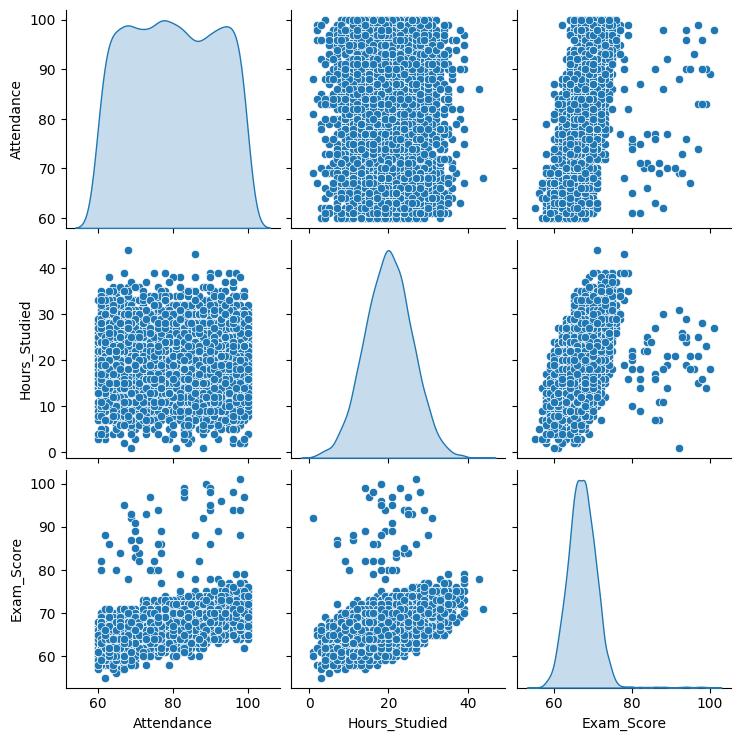

In [36]:
#pairplot para hrs estudio, attendance y exam score
sns.pairplot(data, vars=['Attendance', 'Hours_Studied', 'Exam_Score'], diag_kind='kde')
plt.show()

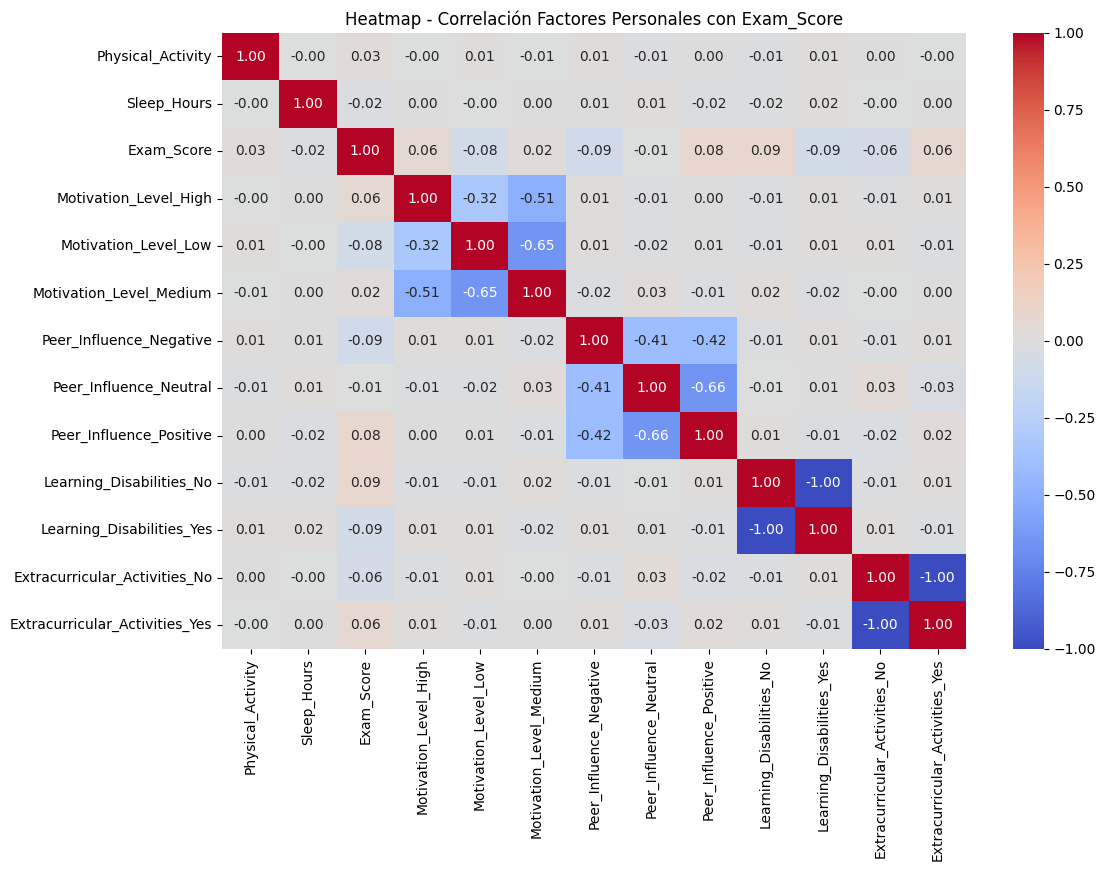

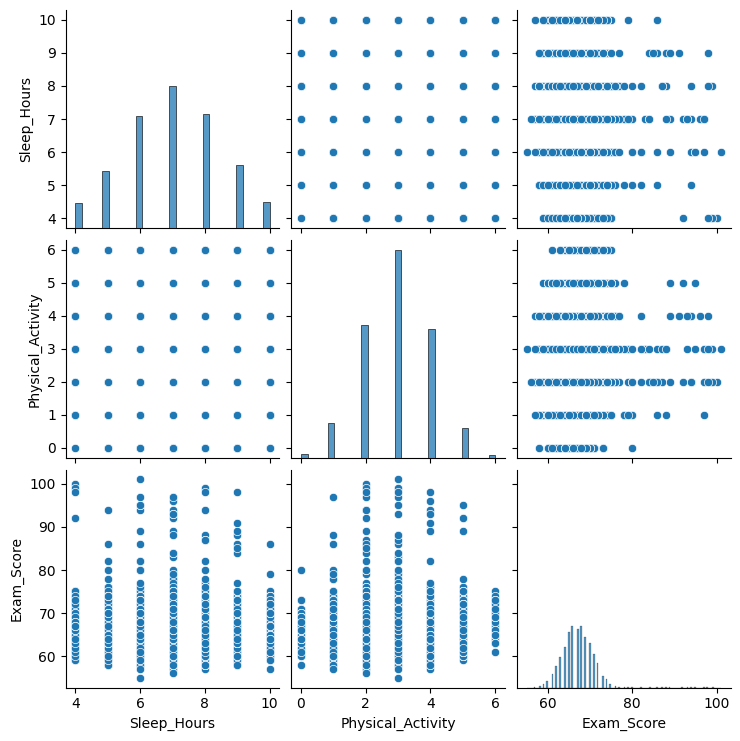

In [37]:
# Variables del objetivo 4
factors_personales = ['Motivation_Level', 'Peer_Influence', 'Learning_Disabilities', 
                      'Physical_Activity', 'Extracurricular_Activities', 'Sleep_Hours']

# One-Hot Encoding para variables categóricas
encoded_personales = pd.get_dummies(data, columns=['Motivation_Level', 'Peer_Influence', 'Learning_Disabilities', 
                                                   'Extracurricular_Activities'], drop_first=False)

# Correlación con variables numéricas
numeric_personales = encoded_personales[['Physical_Activity', 'Sleep_Hours', 'Exam_Score'] + 
                                        [col for col in encoded_personales if col.startswith(('Motivation_Level', 'Peer_Influence', 'Learning_Disabilities', 'Extracurricular_Activities'))]]

correlations_personales = numeric_personales.corr()

# Heatmap para correlaciones
plt.figure(figsize=(12, 8))
sns.heatmap(correlations_personales, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Heatmap - Correlación Factores Personales con Exam_Score")
plt.show()

# Pairplot para analizar interacciones
sns.pairplot(data, vars=['Sleep_Hours', 'Physical_Activity', 'Exam_Score'])
plt.show()

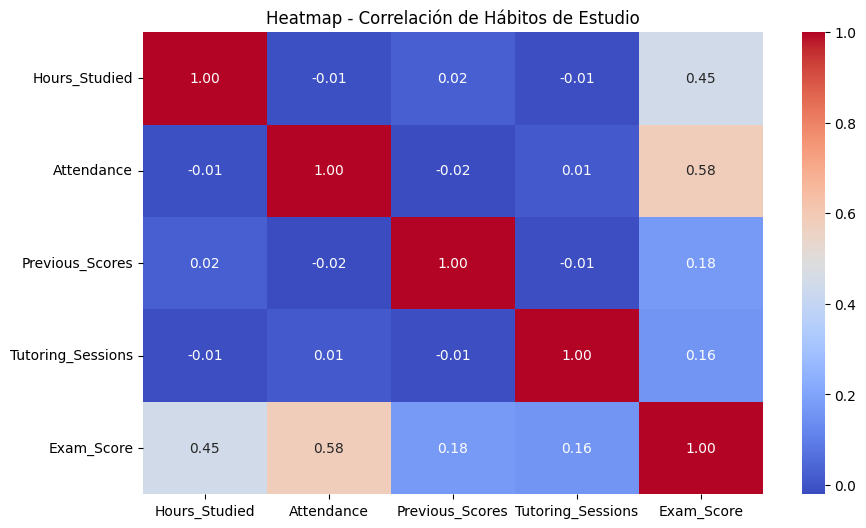

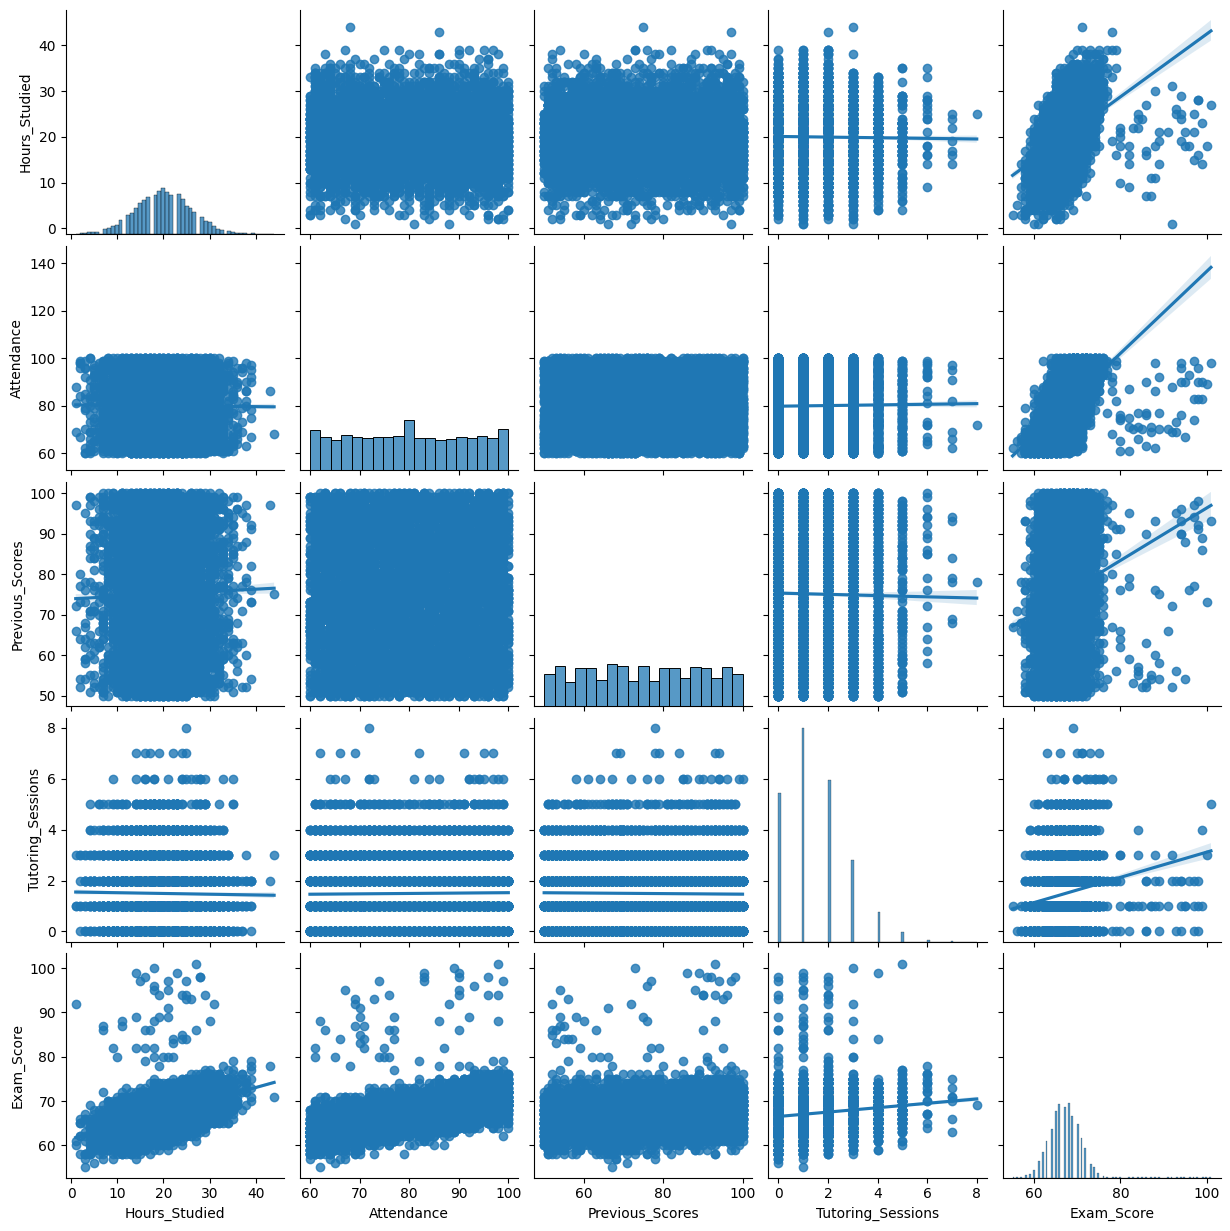

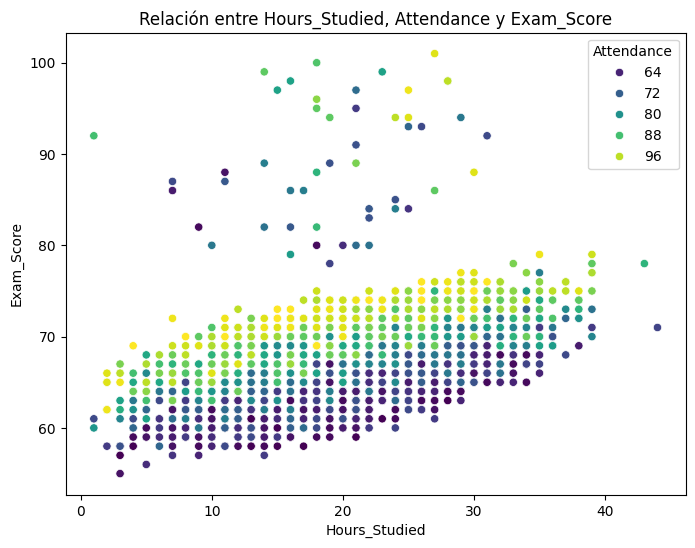

In [38]:
# Análisis de correlación para hábitos de estudio
study_habits = ['Hours_Studied', 'Attendance', 'Previous_Scores', 'Tutoring_Sessions', 'Exam_Score']
correlations_habits = data[study_habits].corr()

# Heatmap de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(correlations_habits, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Heatmap - Correlación de Hábitos de Estudio")
plt.show()

# Pairplot para visualizar interacciones
sns.pairplot(data, vars=study_habits, kind="reg")
plt.show()

# Scatterplot múltiple para horas de estudio y asistencia
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Hours_Studied', y='Exam_Score', hue='Attendance', palette='viridis')
plt.title("Relación entre Hours_Studied, Attendance y Exam_Score")
plt.show()

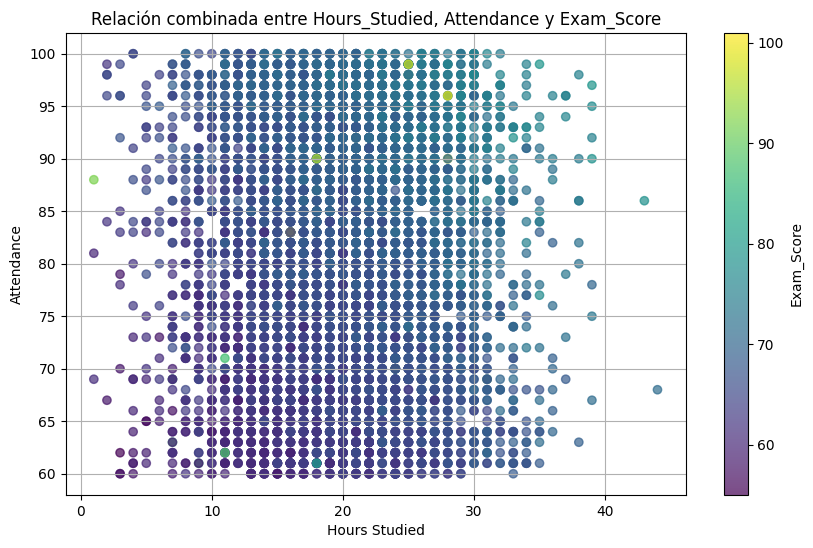

In [43]:
# Scatterplot combinado
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    x=data['Hours_Studied'],
    y=data['Attendance'],
    c=data['Exam_Score'],
    cmap='viridis',
    alpha=0.7
)
plt.colorbar(scatter, label='Exam_Score')
plt.title("Relación combinada entre Hours_Studied, Attendance y Exam_Score")
plt.xlabel("Hours Studied")
plt.ylabel("Attendance")
plt.grid(True)
plt.show()

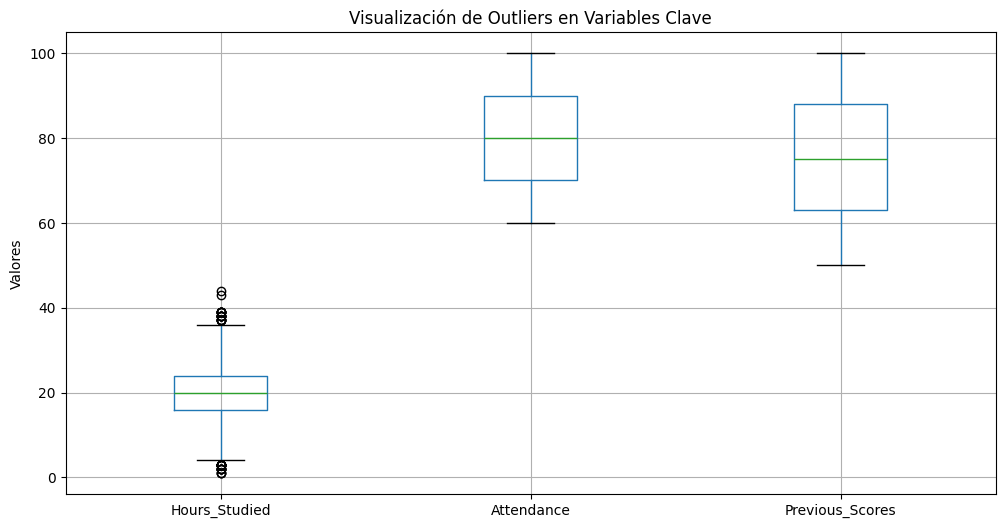

In [44]:
# Boxplots comparativos para variables clave
variables = ['Hours_Studied', 'Attendance', 'Previous_Scores']
plt.figure(figsize=(12, 6))
data[variables].boxplot()
plt.title("Visualización de Outliers en Variables Clave")
plt.ylabel("Valores")
plt.grid(True)
plt.show()